In [27]:
import pandas as pd
import re
from datetime import datetime
import numpy as np
from wordcloud import WordCloud


import matplotlib.pyplot as plt
from nltk import bigrams
from collections import Counter


In [3]:
def filter_emotion(df):
    df = df[['screen_name','joy_pys','sadness_pys','anger_pys','surprise_pys','disgust_pys','fear_pys','full_text','created_at']]#,'created_at'
    # df['date'] = pd.to_datetime(df['date'])
    return df


def replace_column_emotion(df):
    df.columns = df.columns.str.replace('_pys', '', regex=False)
    return df



def convert_date(date_str):
    try:
        date_obj = datetime.strptime(str(date_str), '%a %b %d %H:%M:%S %z %Y')
        return date_obj.strftime('%Y-%m-%d %H:%M:%S')
    except (ValueError, TypeError):
        return np.nan
    
def convert_date_df(df):
    df['date'] = df['created_at'].apply(convert_date)
    df = df.dropna(subset=['date'])
    df['date'] = pd.to_datetime(df['date'])

    # Create 'year' and 'month' columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    return df

# Load Data

In [4]:
file_paths = ['job3_tweets_emotion_pysentimento.csv',
              'job2_tweets_emotion_pysentimento.csv',
              'job13_tweets_emotion_pysentimento.csv',
              'job4_tweets_emotion_pysentimento.csv',
              'job1_tweets_emotion_pysentimento.csv',
              'job12_tweets_emotion_pysentimento.csv',
              'job10_tweets_emotion_pysentimento.csv',
              'job11_tweets_emotion_pysentimento.csv',
              'job7_tweets_emotion_pysentimento.csv',
              'job5_tweets_emotion_pysentimento.csv',
              'job8_tweets_emotion_pysentimento.csv',
              'job6_tweets_emotion_pysentimento.csv',
              'job9_tweets_emotion_pysentimento.csv',
             'job18_tweets_emotion_pysentimento.csv']
OUTPUT_FILE_PATH = '/home/noaai/HCP_State_of_Mind_covid_19/new_code_for_artical/general_new/'
# Read each file into a DataFrame and store it in a list
dfs = [pd.read_csv(OUTPUT_FILE_PATH+file_path) for file_path in file_paths]

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
general = filter_emotion(combined_df)
general = replace_column_emotion(general)
df_g = general

In [5]:
HPS = pd.read_csv('///home/noaai/HCP_State_of_Mind_covid_19/pysentimento_tweets_transformer_and_optim/new/job1_tweets_emotion_pysentimento.csv')
HPS = filter_emotion(HPS)
HPS = replace_column_emotion(HPS)

unique_screen_names = pd.read_csv('../active_h_90.csv')['screen_name'].tolist()
final_h = HPS[HPS['screen_name'].isin(unique_screen_names)]

final_h = convert_date_df(final_h)
new_final_df_g = convert_date_df(df_g)

/tmp/ipykernel_111528/714856803.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  HPS = pd.read_csv('///home/noaai/HCP_State_of_Mind_covid_19/pysentimento_tweets_transformer_and_optim/new/job1_tweets_emotion_pysentimento.csv')
/tmp/ipykernel_111528/3854600636.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['created_at'].apply(convert_date)
/tmp/ipykernel_111528/3854600636.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d

In [7]:
has = pd.read_csv('hastags (1).csv')
has

Unnamed: 0          Column1          category_1           Column2  \
0             0       #ASPNR2019  Medical Conference  #TopNewFollowers   
1             1        #EAST2019  Medical Conference     #ShareTheLove   
2             2  #RITPatientCare            Medicine           #photos   
3             3           #ACC19  Medical Conference     #ShareTheLove   
4             4        #APhA2019  Medical Conference           #photos   
..          ...              ...                 ...               ...   
265         265         #Ukraine                 War          #COVID19   
266         266          #Russia                 War    #cybersecurity   
267         267         #COVID19            COVID-19    #cybersecurity   
268         268       #monkeypox            Medicine          #infosec   
269         269           #COVID            COVID-19          #COVID19   

       category_2  Unnamed: 5 Unnamed: 6  
0    Social Media         NaN        NaN  
1          Social         NaN        NaN  
2             Art         NaN        NaN  
3          Social         NaN        NaN  
4             Art         NaN        NaN  
..            ...         ...        ...  
265      COVID-19         NaN        NaN  
266   Technology          NaN        NaN  
267   Technology          NaN        NaN  
268    Technology         NaN        NaN  
269      COVID-19         NaN        NaN  

[270 rows x 7 columns]

In [8]:
has = pd.read_csv('hastags (1).csv')
has['category_1'] = has['category_1'].apply(lambda a : a.replace('Shoping','Shopping') )
has['category_2'] = has['category_2'].apply(lambda a : a.replace('Shoping','Shopping') )
dict_words_to_topic ={}
for index, row in has.iterrows():
    if row['Column1'] not in dict_words_to_topic.keys():
        dict_words_to_topic[row['Column1']] = row['category_1'].strip() 
    if row['Column2'] not in dict_words_to_topic.keys():
        dict_words_to_topic[row['Column2']] = row['category_2'].strip()

has['category_1'] = has['category_1'].str.strip()
has['category_2'] = has['category_2'].str.strip()

In [9]:
hastags_hacp = list(set(has['Column1'].tolist()))

In [11]:
import pandas as pd

import numpy as np

emotions = ['joy', 'sadness', 'anger', 'surprise', 'disgust', 'fear']

def get_top_has(df,emotion):
    df['date'] = pd.to_datetime(df['date'])
    threshold = df[emotion].quantile(0.9)
    sorted_df = df[df[emotion] > threshold].sort_values(by=emotion, ascending=False)

    # Extract hashtags
    sorted_df['hashtags'] = sorted_df['full_text'].str.findall(r'#[A-Za-z0-9]+').apply(lambda x: x[0] if len(x) > 0 else np.nan)
    # sorted_df['hashtags'] = sorted_df['full_text'].str.findall(r'#[A-Za-z0-9]+')

    # # Explode the dataframe on the 'hashtags' column
    # sorted_df = sorted_df.explode('hashtags')

    return sorted_df
    # Resample data every 3 months and get the top 3 hashtags for each period
    # top_hashtags = df_exploded.groupby(pd.Grouper(key='created_at', freq='3M')).hashtags.value_counts().groupby(level=0, group_keys=False).head(3)  #created_at

In [12]:
ha_h = get_top_has(new_final_df_g,"anger")#final_h

has

Unnamed: 0          Column1          category_1           Column2  \
0             0       #ASPNR2019  Medical Conference  #TopNewFollowers   
1             1        #EAST2019  Medical Conference     #ShareTheLove   
2             2  #RITPatientCare            Medicine           #photos   
3             3           #ACC19  Medical Conference     #ShareTheLove   
4             4        #APhA2019  Medical Conference           #photos   
..          ...              ...                 ...               ...   
265         265         #Ukraine                 War          #COVID19   
266         266          #Russia                 War    #cybersecurity   
267         267         #COVID19            COVID-19    #cybersecurity   
268         268       #monkeypox            Medicine          #infosec   
269         269           #COVID            COVID-19          #COVID19   

       category_2  Unnamed: 5 Unnamed: 6  
0    Social Media         NaN        NaN  
1          Social         NaN        NaN  
2             Art         NaN        NaN  
3          Social         NaN        NaN  
4             Art         NaN        NaN  
..            ...         ...        ...  
265      COVID-19         NaN        NaN  
266    Technology         NaN        NaN  
267    Technology         NaN        NaN  
268    Technology         NaN        NaN  
269      COVID-19         NaN        NaN  

[270 rows x 7 columns]

In [14]:
# covid_tweets = ha_h[ha_h['hashtags'].str.contains(r'#COVID|#COVID19|#Corona|#Pandemic', case=False, na=False)]
# covid_tweets

In [22]:
# list(covid_tweets[(covid_tweets['year']==2020) & covid_tweets['month'].isin([2,3,4])].full_text)

In [25]:
import pandas as pd

def add_category_to_df(df, has,population):
    if population =='hcp':
        has = has[['Column1','category_1']]
        has_renamed = has.rename(columns={'Column1': 'hashtags','category_1': 'category'})
    else:
        has = has[['Column2','category_2']]
        has_renamed = has.rename(columns={'Column2': 'hashtags','category_2': 'category'})

    has_renamed = has_renamed.drop_duplicates()

    df_with_category = pd.merge(df, has_renamed, on='hashtags', how='left')
    
    df_with_category['category'] = df_with_category['category'].fillna('Others')
    # top_hashtags = df_with_category.groupby(pd.Grouper(key='date', freq='3M')).category.value_counts()
    top_hashtags = df_with_category.groupby(pd.Grouper(key='date', freq='3ME')).category.value_counts()


    
    return top_hashtags



In [26]:
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')  # Downloads the tokenizer required for tokenizing text
nltk.download('wordnet')  # Downloads the WordNet data for lemmatization
nltk.download('omw-1.4')  # Optional, to improve lemmatization for multiple languages

punctuation = string.punctuation + '…' + "’" +"”" + "“"

# Defining a list of stopwords including 'im'
stopwords = list(ENGLISH_STOP_WORDS) + ['im',"dont","youre","amp","la","just","did","let","got","want"] + [
    'like', 'time', 'day', 'know', 'need', 
    'say', 'make', 'think', 'right', 'want', 'love', 'going', 'thing',
    'did', 'great', 'way', 'let', 'got', 'really', 
    'look', 'said'
]

# Creating a lemmatizer object for lemmatization
lemmatizer = WordNetLemmatizer()

# Regular expression to detect emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                           u"\U00002702-\U000027B0"  # Miscellaneous Symbols
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)

# Regular expression to handle specific problematic text patterns
problematic_pattern = re.compile(r'[\u2066\u2069]+_+[\u2066\u2069]+')

def process_tweets(text):    
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove content inside square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('(@[A-Za-z0-9_]+)', '', text)  # Remove mentions (e.g., @username)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove new line characters
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing digits
    text = text.replace("rt ", "")  # Remove retweets 'RT'
    text = re.sub('[%s]' % re.escape(punctuation), '', text)  # Remove punctuation including ellipsis

    # Remove emojis
    text = emoji_pattern.sub(r'', text)  # Remove emojis from the text

    # Remove problematic patterns
    text = problematic_pattern.sub('', text)

    tokens = text.split()  # Split text into individual words (tokens)
    
    # Remove stopwords from the tokens
    tokens = [word for word in tokens if word.lower() not in stopwords]  

    # Perform lemmatization on the remaining words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)  
    return cleaned_text


# List of high frequency words
high_frequency_words = [
    'the', 'and', 'a', 'to', 'said', 'in', 'he', 'I', 'of', 'it', 'was', 'you', 'they', 'on', 
    'she', 'is', 'for', 'at', 'his', 'but', 'that', 'with', 'all', 'we', 'can', 'are', 'up', 
    'had', 'my', 'her', 'what', 'there', 'out', 'this', 'have', 'went', 'be', 'like', 'some', 
    'so', 'not', 'then', 'were', 'go', 'little', 'as', 'no', 'mum', 'one', 'them', 'do', 
    'me', 'down', 'dad', 'big', 'when', "it's", 'see', 'looked', 'very', 'look', "don't", 
    'come', 'will', 'into', 'back', 'from', 'children', 'him', 'Mr', 'get', 'just', 'now', 
    'came', 'oh', 'about', 'got', 'their', 'people', 'your', 'put', 'could', 'house', 'old', 
    'too', 'by', 'day', 'made', 'time', "I'm", 'if', 'help', 'Mrs', 'called', 'here', 'off', 
    'asked', 'saw', 'make', 'an',"people","thank","happy","good","today","looking"
]

def remove_high_frequency_words_and_replace(text):
    # Replace 'thanks' with 'thank'
    text = text.replace('thanks', 'thank')
    text = text.replace('seen', '')

    # Split the input text into words
    words = text.split()

    # Filter out high-frequency words
    filtered_words = [word for word in words if word.lower() not in high_frequency_words]

    # Join the filtered words back into a single string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text


<>:39: SyntaxWarning: invalid escape sequence '\['
<>:40: SyntaxWarning: invalid escape sequence '\S'
<>:45: SyntaxWarning: invalid escape sequence '\w'
<>:39: SyntaxWarning: invalid escape sequence '\['
<>:40: SyntaxWarning: invalid escape sequence '\S'
<>:45: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_111528/757233887.py:39: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)  # Remove content inside square brackets
/tmp/ipykernel_111528/757233887.py:40: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
/tmp/ipykernel_111528/757233887.py:45: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)  # Remove words containing digits
[nltk_data] Downloading package punkt to /home/noaai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/noaai/nltk_data...
[nltk_data]   Package wordnet is already up-

In [16]:
# !pip install --upgrade numpy


In [20]:

r1 = "\u2066\u2069" 
r2 = "\u2066\u2069"

In [24]:
ha_h = get_top_has(new_final_df_g,"fear")#final_h


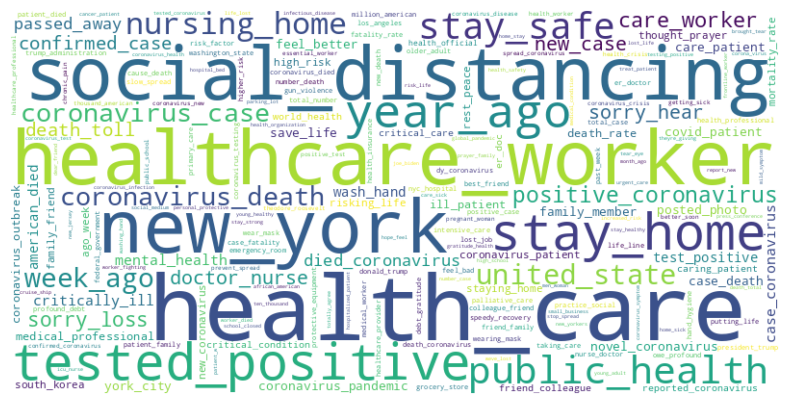

In [32]:
new_j = ha_h




text_data = [remove_high_frequency_words_and_replace(process_tweets(i)).replace(r1,"").replace(r2,"") for i in new_j[(new_j['year'] == 2020) & (new_j['month'].isin([2, 3, 4]))].full_text]
text_data = [i for i in text_data if i != ""]
# Create a list of bigrams from the processed text data
bigram_list = []
for text in text_data:
    words = text.split()
    bigram_list.extend(bigrams(words))

# Convert bigrams to string format and count frequencies
from collections import Counter
bigram_counts = Counter(["_".join(bigram) for bigram in bigram_list])

# Generate a word cloud based on bigrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis labels
plt.show()




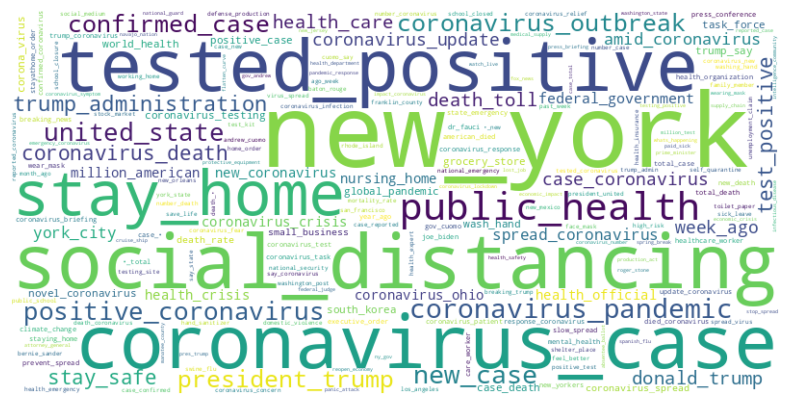

In [44]:
new_j = ha_h#add_category_to_df(ha_h,has,'hcp')

import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import bigrams
from collections import Counter

# Example text data based on the filtered DataFrame 'new_j'
# Example text data based on the filtered DataFrame 'new_j' for months 2, 3, and 4
text_data = [remove_high_frequency_words_and_replace(process_tweets(i)).replace(r1,"").replace(r2,"") for i in new_j[(new_j['year'] == 2020) & (new_j['month'].isin([2, 3, 4]))].full_text]
text_data = [i for i in text_data if i != ""]
# Create a list of bigrams from the processed text data
bigram_list = []
for text in text_data:
    words = text.split()
    bigram_list.extend(bigrams(words))

# Convert bigrams to string format and count frequencies
from collections import Counter
bigram_counts = Counter(["_".join(bigram) for bigram in bigram_list])

# Generate a word cloud based on bigrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis labels

# Save to folderanger
output_dir = 'word_cloud_non_hcp'
os.makedirs(output_dir, exist_ok=True)
wordcloud.to_file(os.path.join(output_dir, 'hcp_bigrams_wordcloud_fear.png'))
plt.show()




In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
unique_hashtags = {'Medical Conference',
 'Social',
 'Disasters',
 'Social Media',
 'Music',
 'Art',
 'Leisure',
 'Sports',
 'News',
 'Law',
 'Fashion',
 'Promotions',
 'Education',
 'Technology',
 'COVID-19',
 'War',
 'Medicine',
 'Others',
 'TV',
 'Memorial',
 'Politics'}

# Using Seaborn's 'pastel' palette
palette = sns.color_palette("Spectral", len(unique_hashtags))
colormap = sns.color_palette(palette).as_hex()  # Convert to hex color codes

# Assign a color to each hashtag
hashtag_shade_dict_n = {hashtag: colormap[i] for i, hashtag in enumerate(unique_hashtags)}

# Display the first few items of the dictionary for demonstration purposes
list(hashtag_shade_dict_n.items())[:10]


[('Medical Conference', '#b61b48'),
 ('Leisure', '#d0384e'),
 ('Promotions', '#df4e4b'),
 ('Music', '#ee6445'),
 ('Others', '#f67f4b'),
 ('TV', '#fa9b58'),
 ('War', '#fdb768'),
 ('Social', '#fece7c'),
 ('Social Media', '#fee28f'),
 ('Disasters', '#fff1a8')]

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Provided unique hashtags set
unique_hashtags = {'Art', 'COVID-19', 'Education', 'Events', 'Home', 'Internet', 'Law', 'Leisure', 
                   'Marketing', 'Medicine', 'Medicine Conference', 'Memorial', 'Music', 'News', 'Others', 'Politics', 
                   'Religion', 'Shopping', 'Social', 'Social Media', 'Sports', 'TV', 'Technology', 'War', 'Weather'}

# Combining provided color palettes and adding yellow
colors_non_hcp = ['lightslategrey', 'skyblue' , 'teal' ]  
colors_hcp = ['lightblue', 'coral', 'lightseagreen']
combined_palette = colors_non_hcp + colors_hcp

# Ensuring the number of colors matches the number of unique hashtags
if len(combined_palette) < len(unique_hashtags):
    combined_palette = sns.color_palette("crest", len(unique_hashtags) )#- len(combined_palette)).as_hex() +

# Assign a color to each hashtag
hashtag_shade_dict_n = {hashtag: combined_palette[i % len(combined_palette)] for i, hashtag in enumerate(unique_hashtags)}



# Display the first few items of the dictionary for demonstration purposes
list(hashtag_shade_dict_n.items())[:10]


[('Events', (0.60736933, 0.78405055, 0.56847436)),
 ('Leisure', (0.56402533, 0.76325185, 0.56935664)),
 ('Music', (0.52038338, 0.74273888, 0.56868323)),
 ('Others', (0.4764113, 0.72239788, 0.56708475)),
 ('Marketing', (0.43493911, 0.70140588, 0.56624286)),
 ('TV', (0.39672238, 0.6796942, 0.56585103)),
 ('War', (0.36525264, 0.65961782, 0.56546873)),
 ('Social', (0.33334501, 0.63685626, 0.56467661)),
 ('Social Media', (0.30421803, 0.61377205, 0.56332267)),
 ('Medicine', (0.27726216, 0.59051189, 0.56137785))]

In [30]:
hashtag_shade_dict_n = {
    "Music": "#FFA07A",  # Light Salmon, warm and inviting
    "TV": "#FA8072",  # Salmon, engaging and lively
    "Art": "#F08080",  # Light Coral, creativity and warmth
    "Sports": "#FF6347",  # Tomato, energetic and passionate
  
    "Promotions": "#da6f00",  # Purple, for creativity and wisdom
    "Fashion": "#F5B041",  # Warm orange, inviting and enthusiastic
 # Bright blue, reflective of connectivity
    "Technology": "#48C9B0",  # Light teal, innovation and modernity
    "Social Media": "#58D68D",  # Bright green, social growth and vibrancy
    "Medicine": "#AED6F1",  # Light blue, clinical and scientific
    "Medical Conference": "#7FB3D5",  # Lighter blue, scientific and professional
    "COVID-19": (0.16290577, 0.24649998, 0.47217025),  # Red, for alert and importance

    "Social": "#008080",  # Light yellow, warmth and community
    "Memorial": "#ABB2B9",  # Soft grey, respect and remembrance
    "Education": "#b4a7d6",  # Light blue, learning and clarity
    "Leisure": "#d5a6bd",  # Light gold, relaxation and joy
    "Disasters": "#6a6a6a",  # Soft red, excitement and occasions
    "News": "#5b5b5b",  # Bright blue, for clarity and trust
    "Politics": "slategray",  # Neutral grey, complexity and balance
    "Law": "#a0a0a0",  # Soft teal, justice and clarity
    "War": "#bcbcbc",  # Darker red, conflict and intensity
    "Weather": "#F7DC6F", 
    "Others": "#E5E7E9"  # Light grey, neutral and adaptable
}




In [31]:
hashtag_shade_dict_n = {
    "Music": "#FFA07A",
    "TV": "#FA8072",
    "Art": "#F08080",
    "Sports": "#FF6347",
    "Promotions": "#da6f00",
    "Fashion": "#F5B041",
    "Technology": "#48C9B0",
    "Social Media": "#58D68D",
    "Medicine": "#AED6F1",
    "Medical Conference": "#7FB3D5",
    "COVID-19": "#ff6347",
    "Social": "#ffd700",
    "Memorial": "#ABB2B9",
    "Education": "#b4a7d6",
    "Leisure": "#d5a6bd",
    "Disasters": "#6a6a6a",
    "News": "#5b5b5b",
    "Politics": "#708090",
    "Law": "#a0a0a0",
    "War": "#bcbcbc",
    "Weather": "#F7DC6F",
    "Others": "#E5E7E9",
    "Internet": "#1E90FF",  
    "Home": "#FFDEAD",
    "Shopping": "#F0E68C",
    "Events": "#EE82EE",
    "Religion": "#FFE4E1"
}


In [32]:
category_shade_dict = {
    "Music": "#FFA07A",  # Light Salmon
    "TV": "#FA8072",     # Salmon
    "Art": "#F08080",     # Light Coral
    "Sports": "#FF6347",  # Tomato
    "Fashion": "#FF4500", # OrangeRed
    "Leisure": "#FF7F50", # Coral
    
    "Technology": "#48C9B0",    # Medium Turquoise
    "Social Media": "#40E0D0",  # Turquoise
    "Internet": "#20B2AA",      # Light Sea Green
    
    "Medicine": "#AED6F1",           # Light Blue
    "Medical Conference": "#85C1E9", # Sky Blue
    "COVID-19": "#5DADE2",           # Steel Blue
    
    "Social": "#FFD700",     # Gold
    "Memorial": "#FFC300",   # Goldenrod
    "Education": "#FFB900",  # Dark Goldenrod
    "Religion": "#FFA500",   # Orange
    "Events": "#FF8C00",     # Dark Orange
    
    "News": "#5B5B5B",    # Dim Gray
    "Politics": "#4F4F4F", # Dark Gray
    "Law": "#3C3C3C",     # Darker Gray
    "War": "#2F2F2F",     # Almost Black
    
    "Disasters": "#6A6A6A", # Dark Slate Gray
    "Weather": "#778899",   # Light Slate Gray
    
    "Promotions": "#F0E68C", # Khaki
    "Shopping": "#EEE8AA",   # Pale Goldenrod
    "Home": "#F5DEB3",       # Wheat
    
    "Others": "#E5E7E9" # Light Gray
}

from collections import OrderedDict

new_order = OrderedDict()
new_order['Others'] = category_shade_dict['Others']

for key, value in category_shade_dict.items():
    if key != 'Others':
        new_order[key] = value


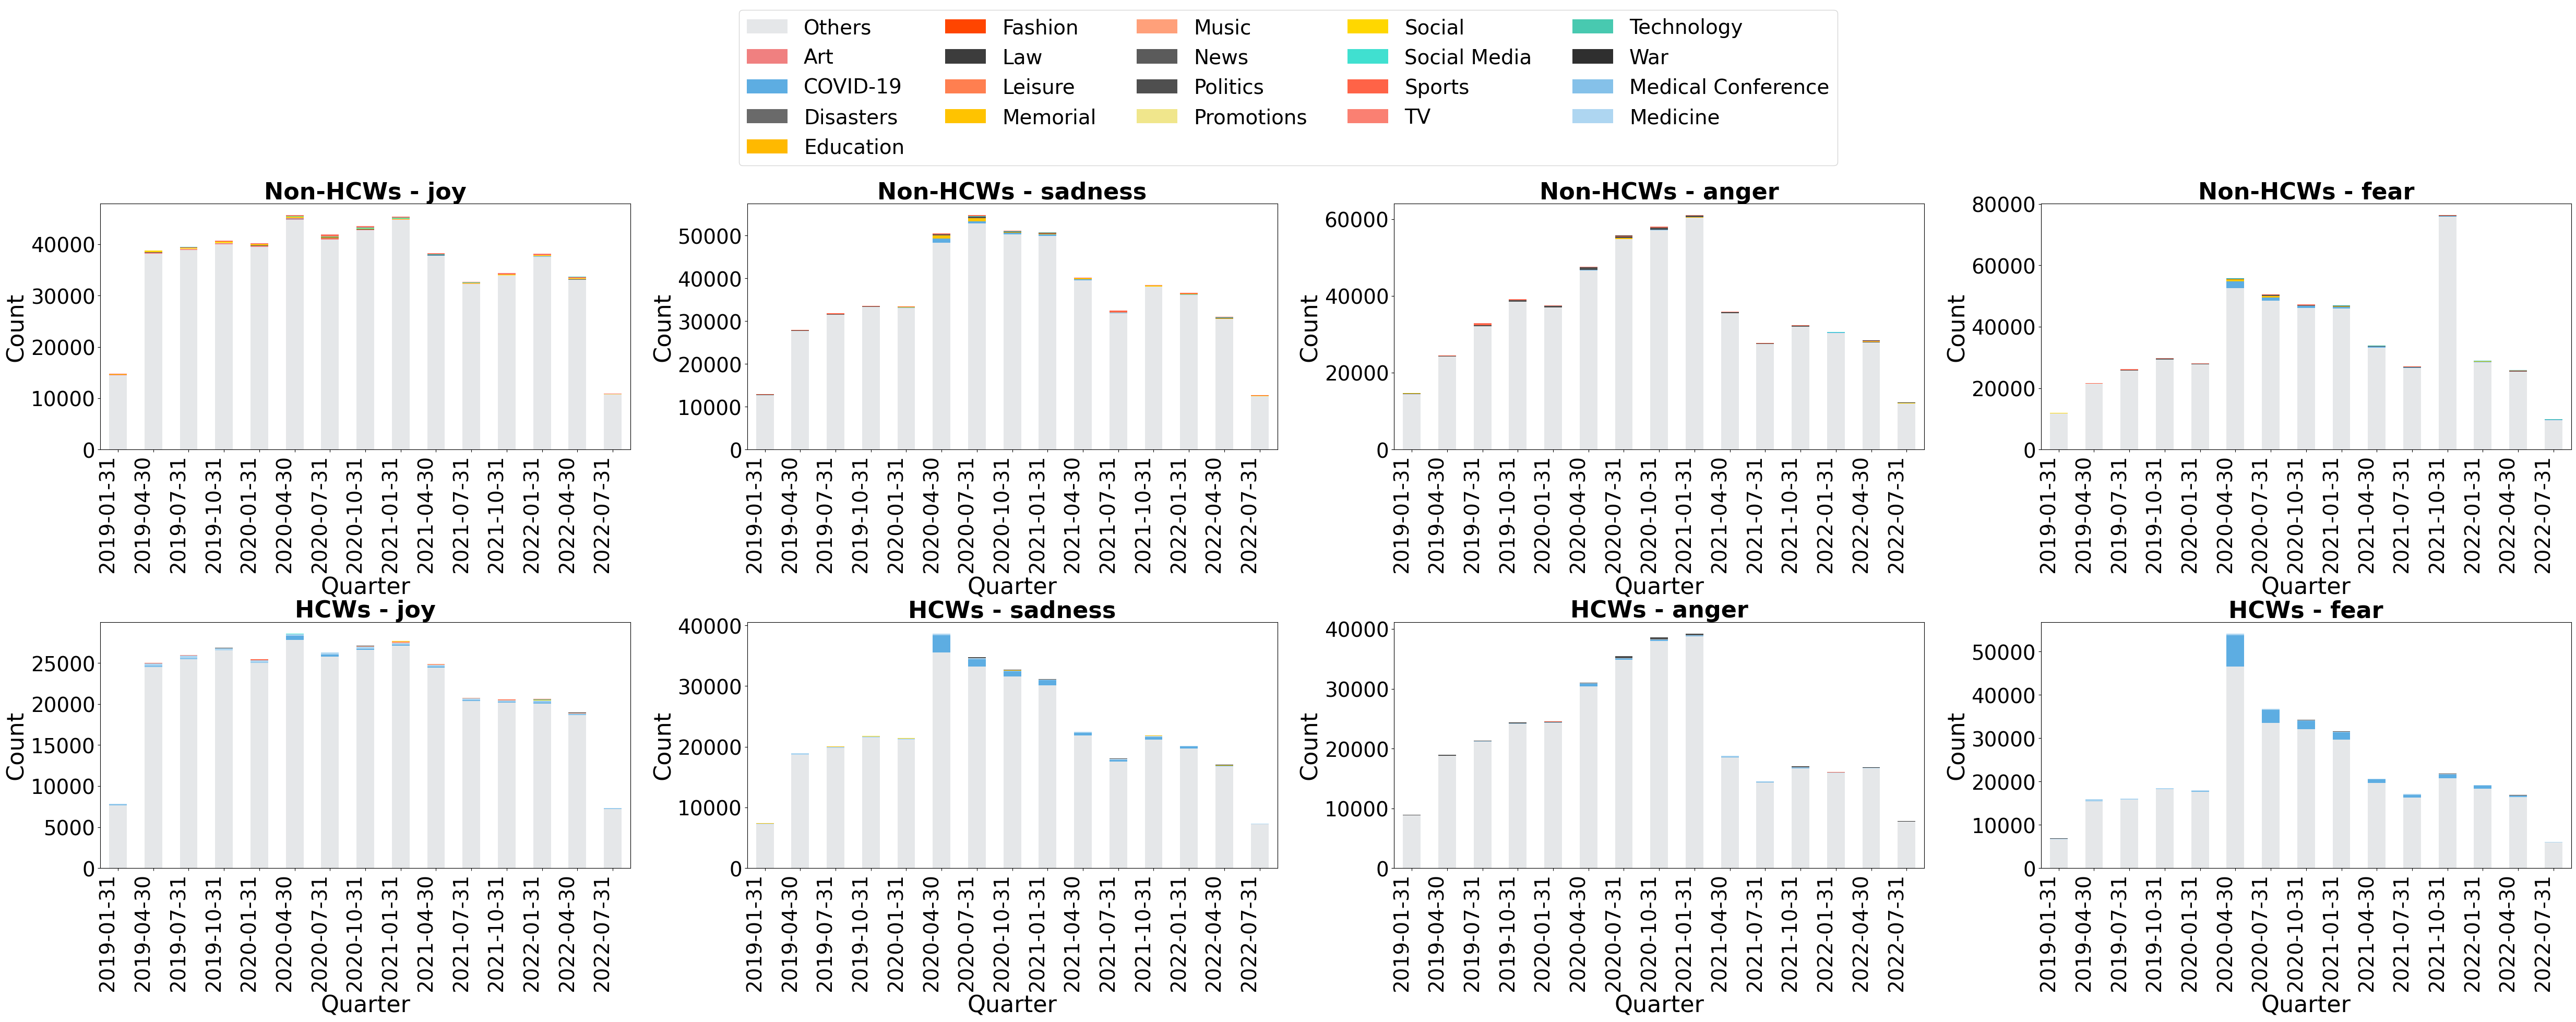

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


dic = {
'joy': 900,
'sadness': 3500,
'anger': 700,
'fear': 9000
}

def plot_df(top_hashtags, ax, title, emotion, hashtag_color_dict, dict_words_to_topic):
    hashtags = top_hashtags.index.get_level_values(1).unique().tolist()
    top_hashtags = top_hashtags.unstack()

    sorted_columns = ['Others'] + [col for col in top_hashtags.columns if col != 'Others']
    top_hashtags = top_hashtags[sorted_columns]
    
    # Plotting the sorted data
    top_hashtags.plot(kind='bar', stacked=True, ax=ax, color=[hashtag_color_dict[col] for col in sorted_columns])

    labels = [label.get_text().split(" ")[0] for label in ax.get_xticklabels()]  # שומר רק את החלק של התאריך
    ax.set_xticklabels(labels, rotation=90, ha='right')

    # Setting axis titles and labels
    ax.set_title(f'{title} - {emotion}', fontsize=32, fontweight='bold')
    ax.set_ylabel('Count', fontsize=32)  # Hashtag 
    ax.set_xlabel('Quarter', fontsize=32)
    # ax.set_ylim(0, dic[emotion])
    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.get_legend().remove()  # Removing legend for each subplot

def create_dashboard(final_h, final_df_g, emotions, hashtag_shade_dict_n, dict_words_to_topic):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(50, 20))  # Adjust ncols based on number of emotions

    handles_list, labels_list = [], []  # Variables to store handles and labels for the legend

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        top_hashtags_df1 = get_top_has(final_df_g, emotion)  # Assuming get_top_has is defined elsewhere
        top_hashtags_df1 = add_category_to_df(top_hashtags_df1, has, 'nonhcp')
        plot_df(top_hashtags_df1, ax_nonhcp, 'Non-HCWs', emotion, hashtag_shade_dict_n, dict_words_to_topic)

        top_hashtags_df2 = get_top_has(final_h, emotion)  # Assuming get_top_has is defined elsewhere
        top_hashtags_df2 = add_category_to_df(top_hashtags_df2, has, 'hcp')
        plot_df(top_hashtags_df2, ax_hcp, 'HCWs', emotion, hashtag_shade_dict_n, dict_words_to_topic)

        # Get handles and labels from both ax_nonhcp and ax_hcp
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()

        # Add to the collective handles and labels
        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    unique_handles_labels = dict(zip(labels_list, handles_list))  # Remove duplicates by using a dict
    fig.legend(unique_handles_labels.values(), unique_handles_labels.keys(), loc='upper center', ncol=5, fontsize=28)

    # Adjust subplot parameters as needed
    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.subplots_adjust(top=0.80, hspace=0.7)  # Add space between rows (hspace)

    plt.show()

# Example usage with 4 emotions
emotions = ['joy', 'sadness', 'anger', 'fear']
create_dashboard(final_h, new_final_df_g, emotions, new_order, dict_words_to_topic)


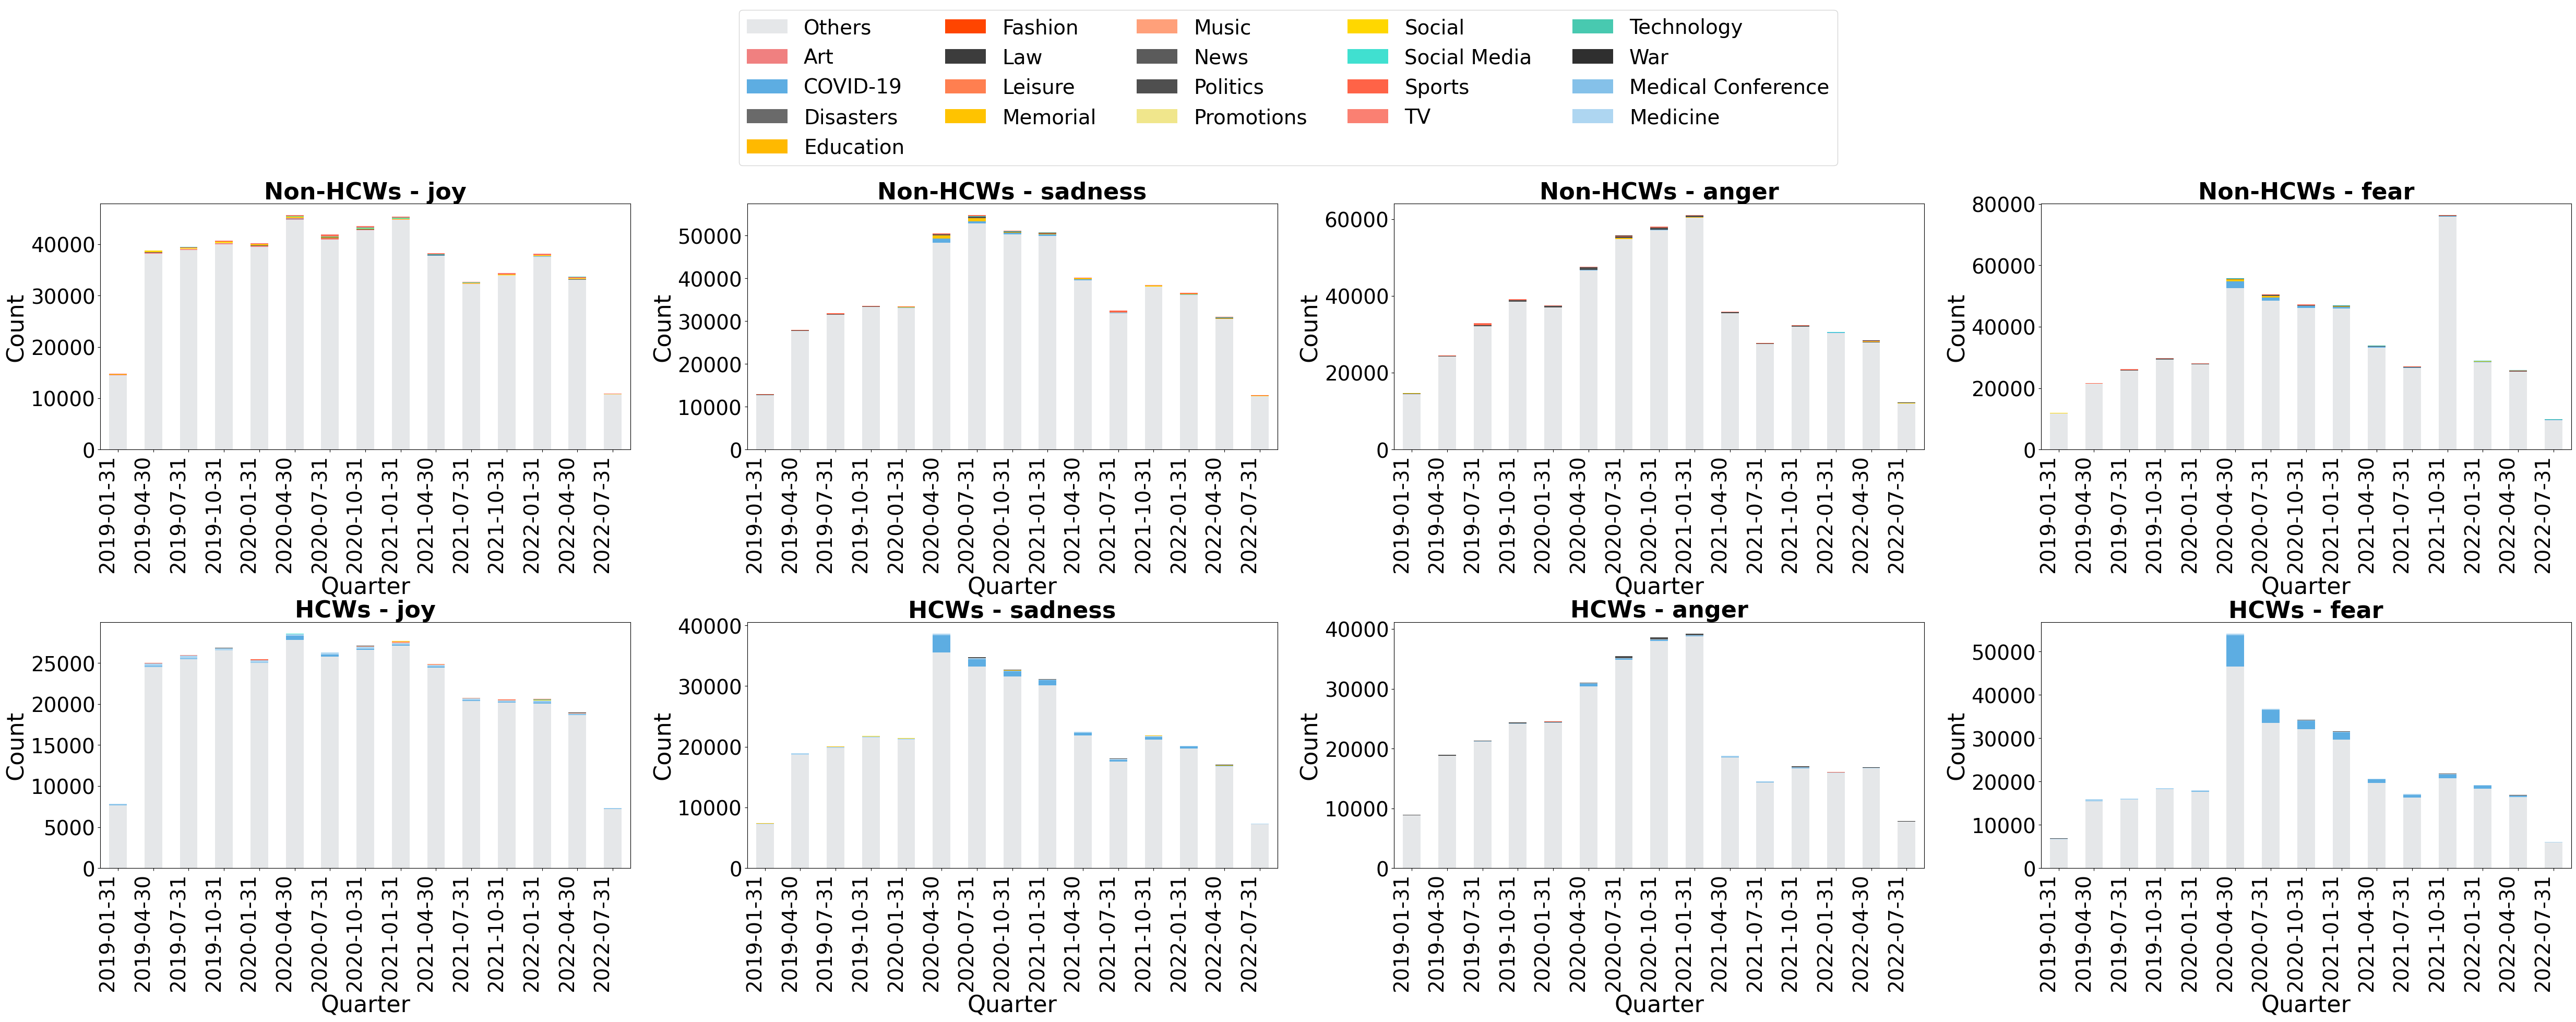

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


dic = {
'joy': 900,
'sadness': 3500,
'anger': 700,
'fear': 9000
}

def plot_df(top_hashtags, ax, title, emotion, hashtag_color_dict, dict_words_to_topic):
    hashtags = top_hashtags.index.get_level_values(1).unique().tolist()
    top_hashtags = top_hashtags.unstack()

    sorted_columns = ['Others'] + [col for col in top_hashtags.columns if col != 'Others']
    top_hashtags = top_hashtags[sorted_columns]
    
    # Plotting the sorted data
    top_hashtags.plot(kind='bar', stacked=True, ax=ax, color=[hashtag_color_dict[col] for col in sorted_columns])

    labels = [label.get_text().split(" ")[0] for label in ax.get_xticklabels()]  # שומר רק את החלק של התאריך
    ax.set_xticklabels(labels, rotation=90, ha='right')

    # Setting axis titles and labels
    ax.set_title(f'{title} - {emotion}', fontsize=32, fontweight='bold')
    ax.set_ylabel('Count', fontsize=32)  # Hashtag 
    ax.set_xlabel('Quarter', fontsize=32)
    # ax.set_ylim(0, dic[emotion])
    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.get_legend().remove()  # Removing legend for each subplot

def create_dashboard(final_h, final_df_g, emotions, hashtag_shade_dict_n, dict_words_to_topic):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(50, 20))  # Adjust ncols based on number of emotions

    handles_list, labels_list = [], []  # Variables to store handles and labels for the legend

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        top_hashtags_df1 = get_top_has(final_df_g, emotion)  # Assuming get_top_has is defined elsewhere
        top_hashtags_df1 = add_category_to_df(top_hashtags_df1, has, 'nonhcp')
        plot_df(top_hashtags_df1, ax_nonhcp, 'Non-HCWs', emotion, hashtag_shade_dict_n, dict_words_to_topic)

        top_hashtags_df2 = get_top_has(final_h, emotion)  # Assuming get_top_has is defined elsewhere
        top_hashtags_df2 = add_category_to_df(top_hashtags_df2, has, 'hcp')
        plot_df(top_hashtags_df2, ax_hcp, 'HCWs', emotion, hashtag_shade_dict_n, dict_words_to_topic)

        # Get handles and labels from both ax_nonhcp and ax_hcp
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()

        # Add to the collective handles and labels
        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    unique_handles_labels = dict(zip(labels_list, handles_list))  # Remove duplicates by using a dict
    fig.legend(unique_handles_labels.values(), unique_handles_labels.keys(), loc='upper center', ncol=5, fontsize=28)

    # Adjust subplot parameters as needed
    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.subplots_adjust(top=0.80, hspace=0.7)  # Add space between rows (hspace)

    plt.show()

# Example usage with 4 emotions
emotions = ['joy', 'sadness', 'anger', 'fear']
create_dashboard(final_h, new_final_df_g, emotions, new_order, dict_words_to_topic)


In [35]:
category_shade_dict = {
    "Music": "#FFA07A",  # Light Salmon
    "TV": "#FF4500",     # OrangeRed - שונה
    "Art": "#FA8072",    # Salmon
    "Sports": "#FF6347", # Tomato
    "Fashion": "#FF69B4",# Hot Pink
    
    "Leisure": "#FF7F50",# Coral
    
    "Technology": "#48C9B0",    # Medium Turquoise
    "Social Media": "#40E0D0",  # Turquoise
    "Internet": "#20B2AA",      # Light Sea Green
    
    "Medicine": "#AED6F1",           # Light Blue
    "Medical Conference": "#3498DB", # Dodger Blue - שונה
    "COVID-19": "#1F618D",           # Dark Blue - שונה
    
    "Social": "#FFD700",     # Gold
    "Memorial": "#FFC300",   # Goldenrod
    "Education": "#FFAA00",  # Dark Orange - שונה
    "Religion": "#FFA500",   # Orange
    "Events": "#FF8C00",     # Dark Orange
    
    "News": "#4C4C4C",    # Charcoal Gray
    "Politics": "#2F4F4F", # Dark Slate
    
    "Law": "#3C3C3C",     # Darker Gray
    "War": "#2F2F2F",     # Almost Black
    
    "Disasters": "#6A6A6A", # Dark Slate Gray
    "Weather": "#778899",   # Light Slate Gray
    
    "Promotions": "#F0E68C", # Khaki
    "Shopping": "#EEE8AA",   # Pale Goldenrod
    "Home": "#F5DEB3",       # Wheat
    
    "Others": "#E5E7E9" # Light Gray
}

from collections import OrderedDict

new_order = OrderedDict()
new_order['Others'] = category_shade_dict['Others']

for key, value in category_shade_dict.items():
    if key != 'Others':
        new_order[key] = value


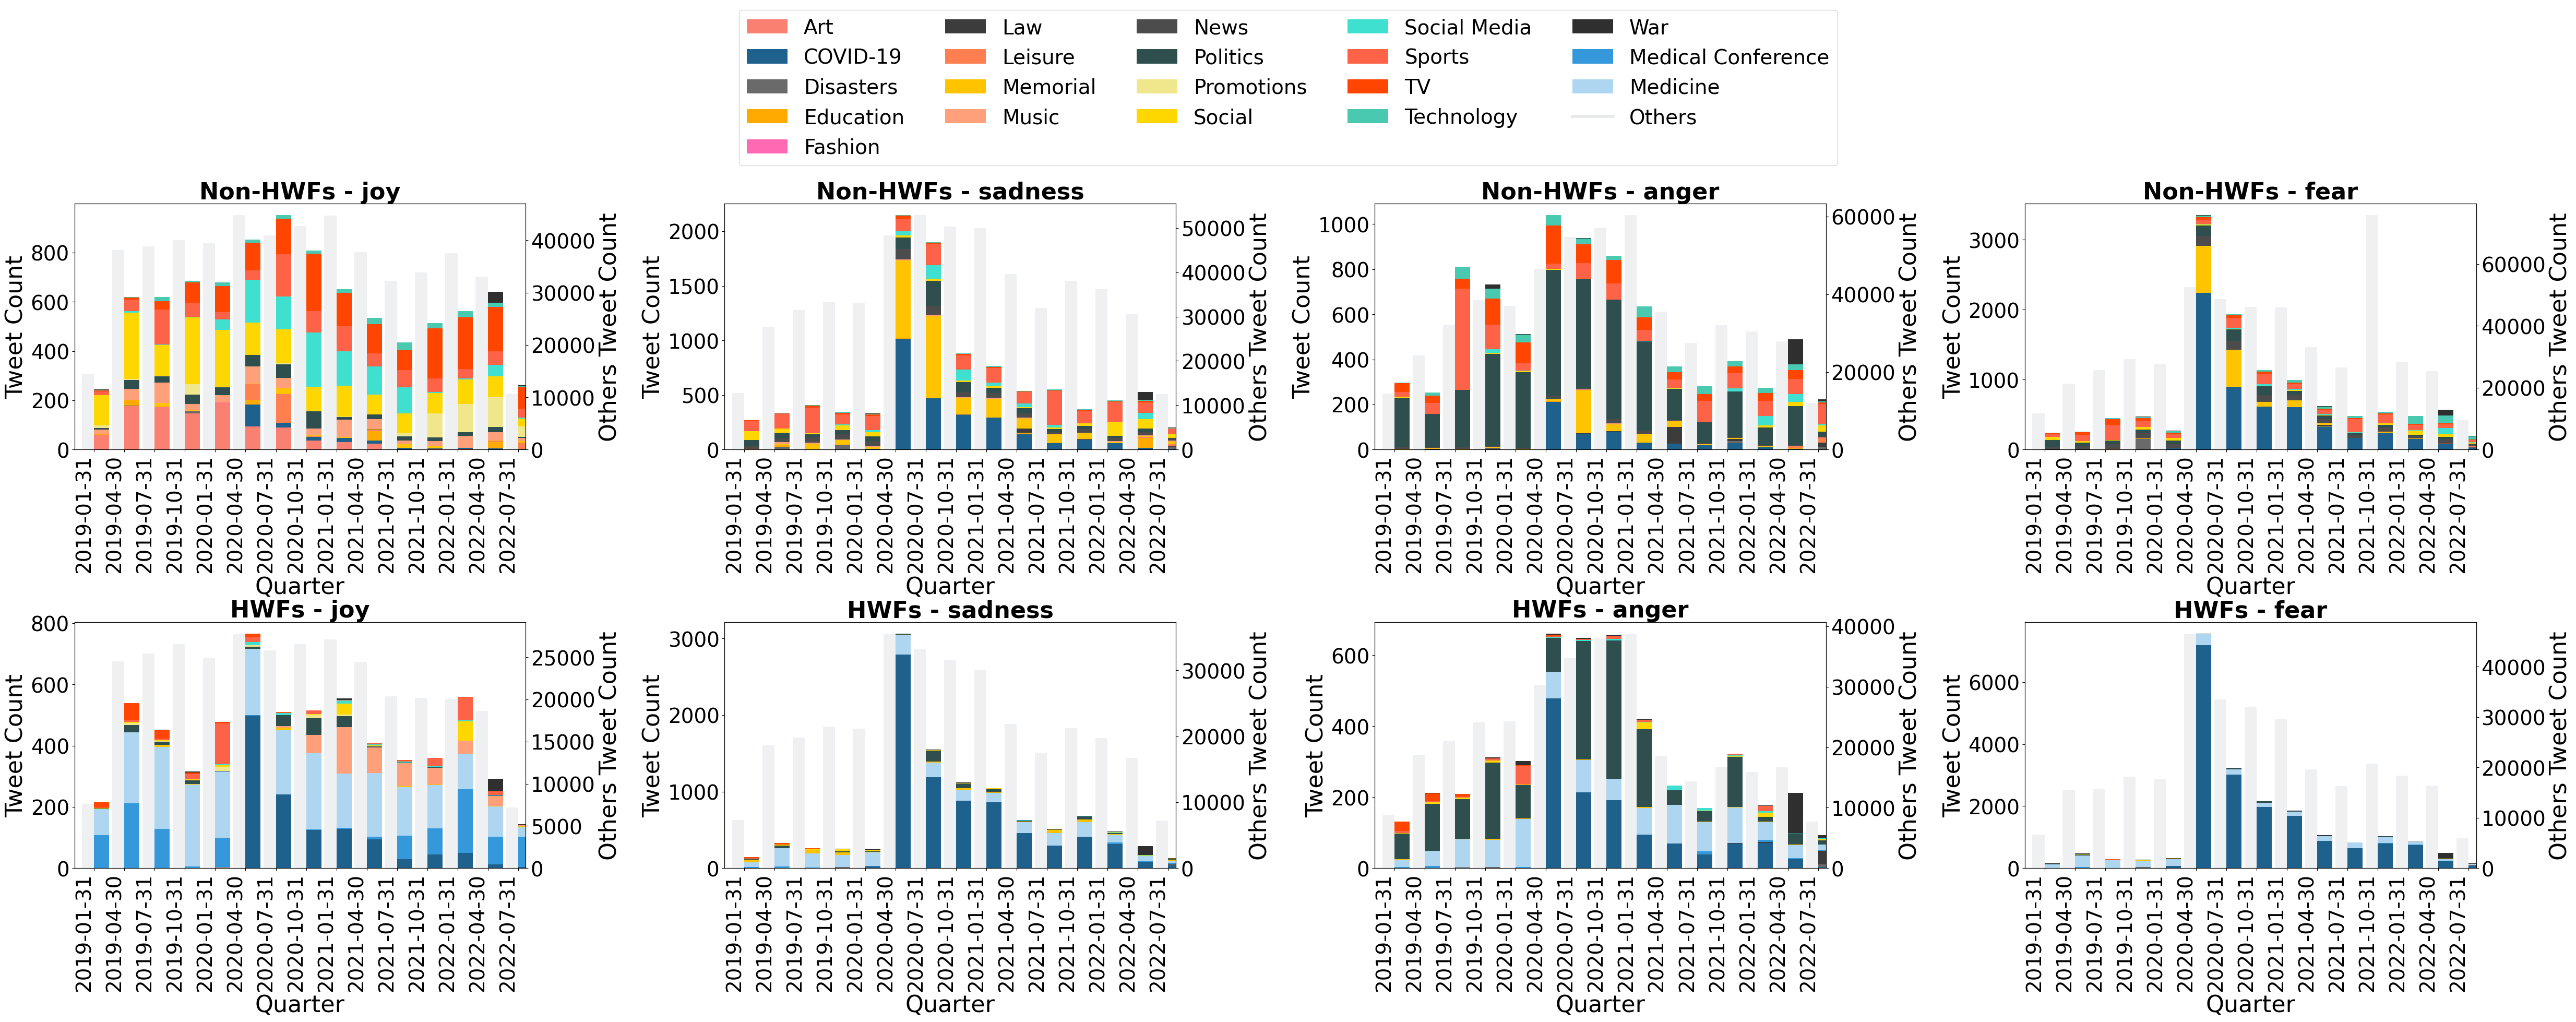

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

dic = {
'joy': 900,
'sadness': 3500,
'anger': 700,
'fear': 9000
}

def plot_df(top_hashtags, ax, title, emotion, hashtag_color_dict, dict_words_to_topic):
    hashtags = top_hashtags.index.get_level_values(1).unique().tolist()
    top_hashtags = top_hashtags.unstack()

    # Sort columns and separate "Others" from the rest
    sorted_columns = [col for col in top_hashtags.columns if col != 'Others']
    others_column = ['Others'] if 'Others' in top_hashtags.columns else []
    
    # Plot the main hashtags (excluding "Others") on the left Y axis
    ax_left = ax
    top_hashtags[sorted_columns].plot(kind='bar', stacked=True, ax=ax_left, color=[hashtag_color_dict[col] for col in sorted_columns], position=0)
    
    # Create a secondary Y axis for "Others"
    if others_column:
        ax_right = ax_left.twinx()
        # Add an offset to the bars for "Others" to avoid overlap
        top_hashtags[others_column].plot(kind='bar', stacked=True, ax=ax_right, color=[hashtag_color_dict['Others']], alpha=0.6, position=1, width=0.4)
        ax_right.set_ylabel('Others Tweet Count', fontsize=32)
        ax_right.tick_params(axis='y', labelsize=28)

    # Set X axis labels
    labels = [label.get_text().split(" ")[0] for label in ax_left.get_xticklabels()]  # Trim the date labels
    ax_left.set_xticklabels(labels, rotation=90, ha='right')

    # Set the main axis titles and labels
    ax_left.set_title(f'{title} - {emotion}', fontsize=32, fontweight='bold')
    ax_left.set_ylabel('Tweet Count', fontsize=32)
    ax_left.set_xlabel('Quarter', fontsize=32)
    ax_left.tick_params(axis='both', which='major', labelsize=28)

    # Ensure no legend is displayed for individual subplots
    ax_left.get_legend().remove()
    if others_column:
        ax_right.get_legend().remove()

def create_dashboard(final_h, final_df_g, emotions, hashtag_shade_dict_n, dict_words_to_topic):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(50, 20))

    handles_list, labels_list = [], []

    # Create dictionaries to store all tables
    nonhcp_tables = {}
    hcp_tables = {}

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        # For non-HCWs
        top_hashtags_df1 = get_top_has(final_df_g, emotion)
        top_hashtags_df1 = add_category_to_df(top_hashtags_df1, has, 'nonhcp')
        plot_df(top_hashtags_df1, ax_nonhcp, 'Non-HWFs', emotion, hashtag_shade_dict_n, dict_words_to_topic)
        nonhcp_tables[emotion] = top_hashtags_df1.copy()

        # For HCWs
        top_hashtags_df2 = get_top_has(final_h, emotion)
        top_hashtags_df2 = add_category_to_df(top_hashtags_df2, has, 'hcp')
        plot_df(top_hashtags_df2, ax_hcp, 'HWFs', emotion, hashtag_shade_dict_n, dict_words_to_topic)
        hcp_tables[emotion] = top_hashtags_df2.copy()

        # Legend
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()
        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    if 'Others' not in labels_list:
        labels_list.append('Others')
        handles_list.append(plt.Line2D([0], [0], color=hashtag_shade_dict_n['Others'], lw=4))

    unique_handles_labels = dict(zip(labels_list, handles_list))
    fig.legend(unique_handles_labels.values(), unique_handles_labels.keys(), loc='upper center', ncol=5, fontsize=28)
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.80, hspace=0.7)
    plt.show()

    return nonhcp_tables, hcp_tables


# Example usage with 4 emotions
emotions = ['joy', 'sadness', 'anger', 'fear']
top_hashtags_df1,top_hashtags_df2 = create_dashboard(final_h, new_final_df_g, emotions, new_order, dict_words_to_topic)


# Save Data

In [53]:
import pickle

with open('Fig_4/category_non_hcp.pkl', 'wb') as f:
    pickle.dump(top_hashtags_df1, f)

with open('Fig_4/category_hcp.pkl', 'wb') as f:
    pickle.dump(top_hashtags_df2, f)


# Load Data

In [41]:
import pickle

with open('Fig_4/category_non_hcp.pkl', 'rb') as f:
    top_hashtags_df1_loaded = pickle.load(f)

with open('Fig_4/category_hcp.pkl', 'rb') as f:
    top_hashtags_df2_loaded = pickle.load(f)


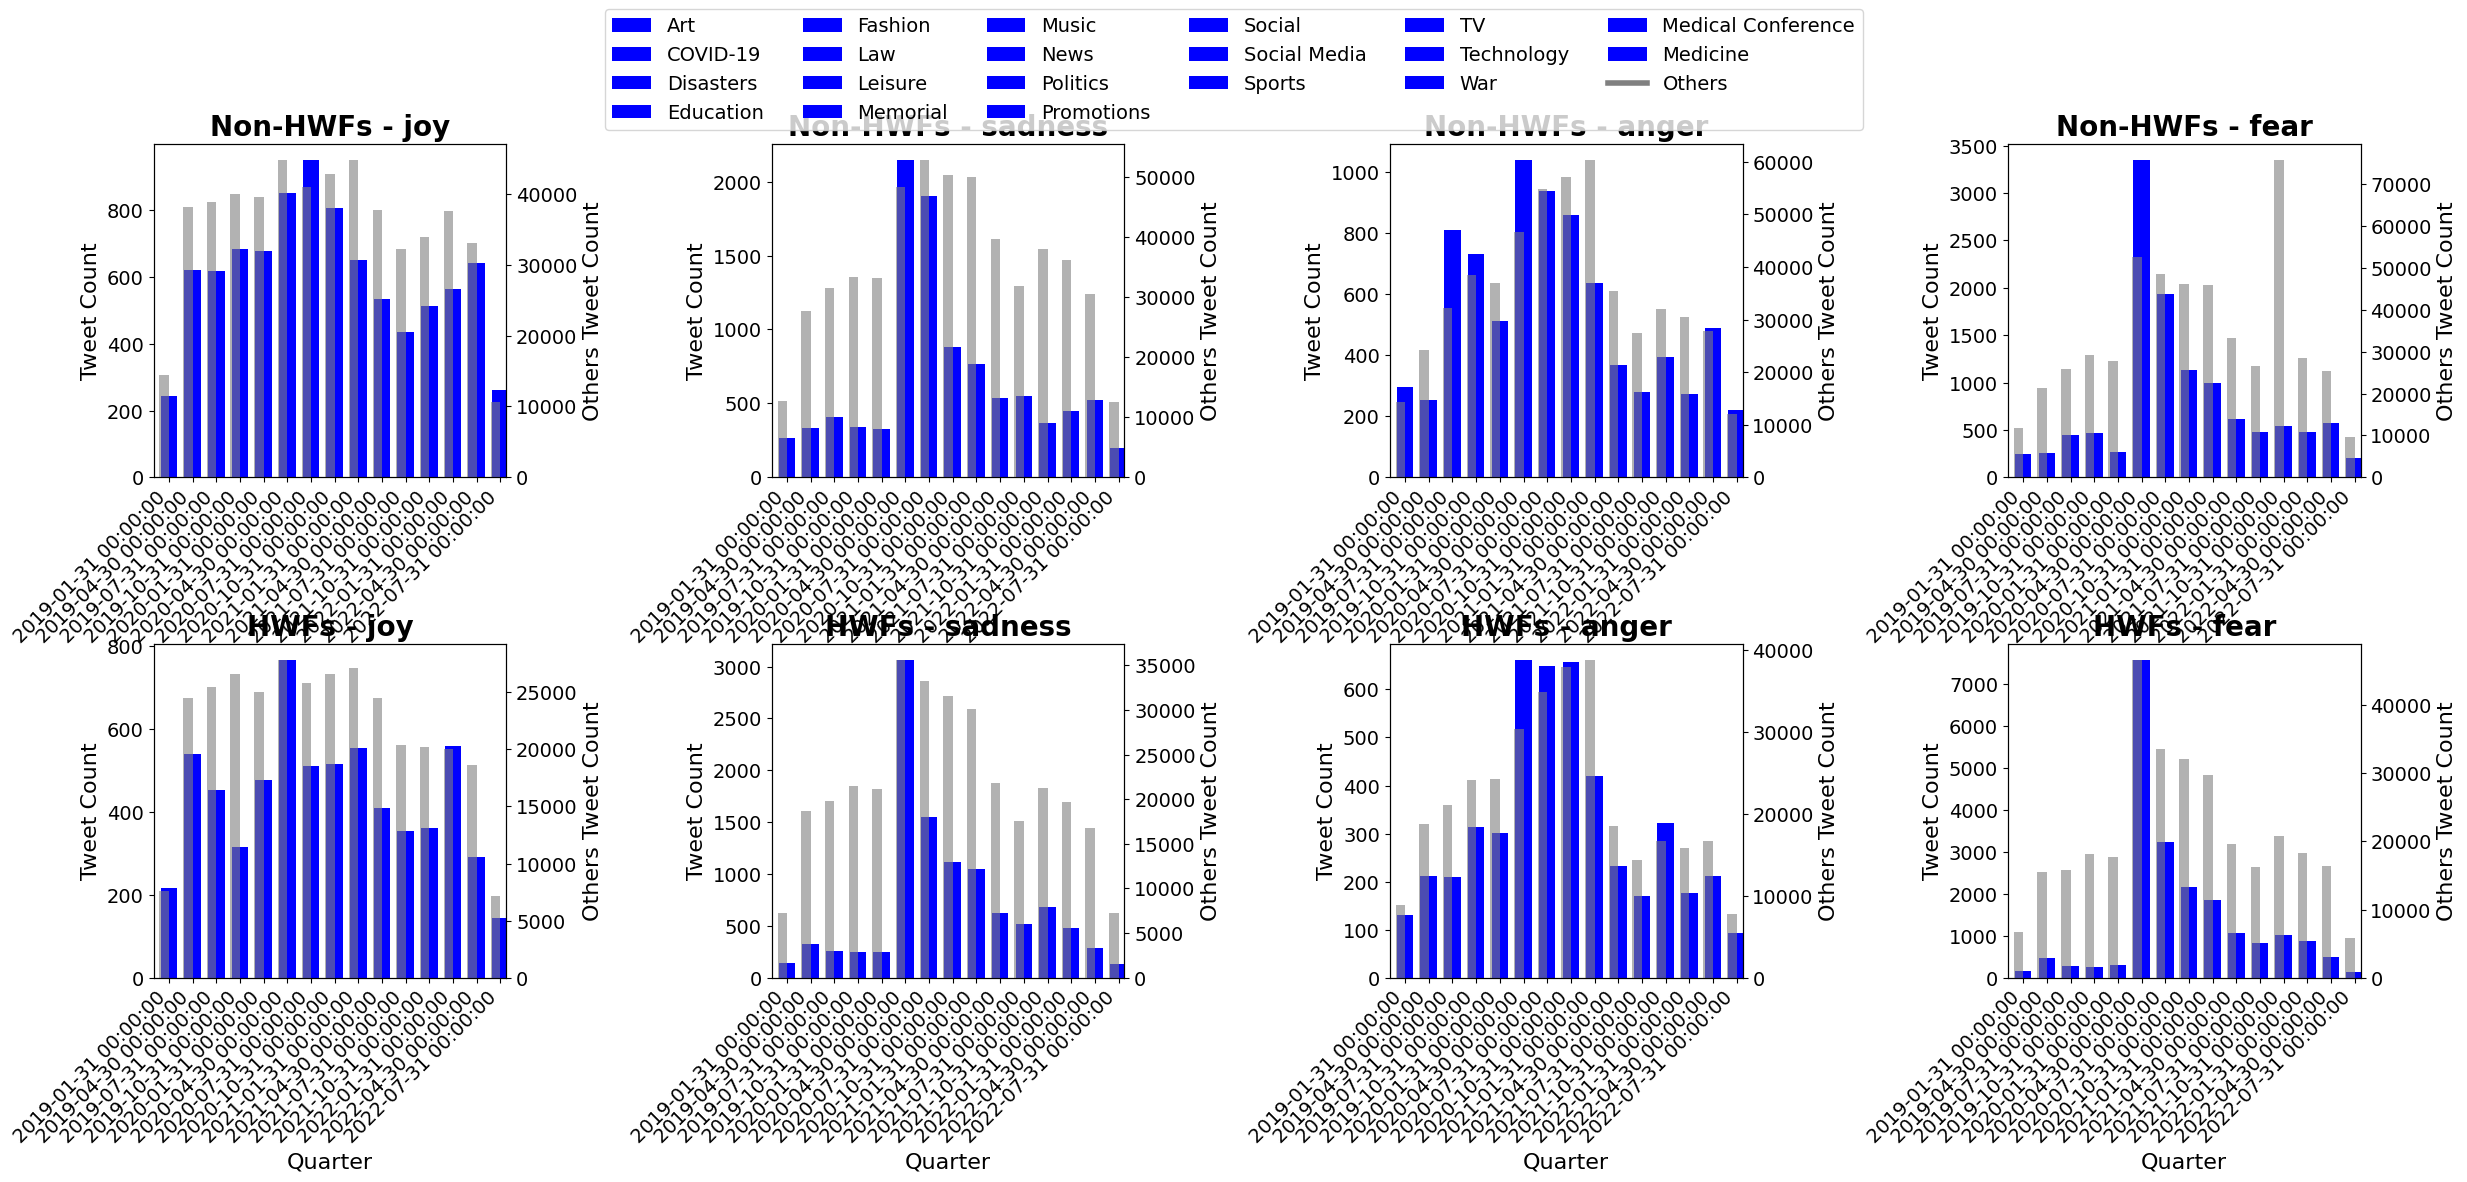

In [57]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# ===== Step 1: Load Pickled Data =====
with open('Fig_4/category_non_hcp.pkl', 'rb') as f:
    top_hashtags_df1 = pickle.load(f)

with open('Fig_4/category_hcp.pkl', 'rb') as f:
    top_hashtags_df2 = pickle.load(f)

# Ensure DataFrame format
if isinstance(top_hashtags_df1, dict):
    top_hashtags_df1 = pd.DataFrame(top_hashtags_df1)

if isinstance(top_hashtags_df2, dict):
    top_hashtags_df2 = pd.DataFrame(top_hashtags_df2)

# ===== Step 2: Define Color Dictionary =====
hashtag_color_dict = {
    col: color for col, color in zip(top_hashtags_df1.columns, plt.cm.tab20.colors)
}
hashtag_color_dict['Others'] = 'gray'

# Dummy topic dictionary if needed
dict_words_to_topic = {}

# ===== Step 3: Define Plotting Function =====
def plot_df(top_hashtags, ax, title, emotion, hashtag_color_dict, dict_words_to_topic):
    if isinstance(top_hashtags.index, pd.MultiIndex):
        top_hashtags = top_hashtags.unstack()

    # Sort columns and separate "Others"
    sorted_columns = [col for col in top_hashtags.columns if col != 'Others']
    others_column = ['Others'] if 'Others' in top_hashtags.columns else []

    # Sort index (assuming it's time-based)
    top_hashtags = top_hashtags.sort_index()

    # Plot stacked bars (main categories)
    ax_left = ax
    top_hashtags[sorted_columns].plot(
        kind='bar',
        stacked=True,
        ax=ax_left,
        color=[hashtag_color_dict.get(col, 'blue') for col in sorted_columns],
        width=0.7
    )

    # Plot 'Others' as secondary Y-axis
    if others_column:
        ax_right = ax_left.twinx()
        top_hashtags[others_column].plot(
            kind='bar',
            stacked=True,
            ax=ax_right,
            color=[hashtag_color_dict['Others']],
            alpha=0.6,
            width=0.4,
            position=1
        )
        ax_right.set_ylabel('Others Tweet Count', fontsize=16)
        ax_right.tick_params(axis='y', labelsize=14)

    # Format x-axis labels
    ax_left.set_xticks(range(len(top_hashtags.index)))
    ax_left.set_xticklabels(top_hashtags.index, rotation=45, ha='right')

    ax_left.set_title(f'{title} - {emotion}', fontsize=20, fontweight='bold')
    ax_left.set_ylabel('Tweet Count', fontsize=16)
    ax_left.set_xlabel('Quarter', fontsize=16)
    ax_left.tick_params(axis='both', labelsize=14)

    # Optional: keep or remove legend
    ax_left.get_legend().remove()
    if others_column:
        ax_right.get_legend().remove()

# ===== Step 4: Create Final Dashboard =====
def create_dashboard(top_hashtags_df1, top_hashtags_df2, emotions, hashtag_color_dict, dict_words_to_topic):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(5*len(emotions)+5, 12))
    handles_list, labels_list = [], []

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        plot_df(top_hashtags_df1[emotion], ax_nonhcp, 'Non-HWFs', emotion, hashtag_color_dict, dict_words_to_topic)
        plot_df(top_hashtags_df2[emotion], ax_hcp, 'HWFs', emotion, hashtag_color_dict, dict_words_to_topic)

        # Get legend handles (if needed later)
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()
        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    # Add 'Others' manually to legend if not present
    if 'Others' not in labels_list:
        labels_list.append('Others')
        handles_list.append(plt.Line2D([0], [0], color=hashtag_color_dict['Others'], lw=4))

    unique_handles_labels = dict(zip(labels_list, handles_list))

    fig.legend(
        unique_handles_labels.values(),
        unique_handles_labels.keys(),
        loc='upper center',
        ncol=min(6, len(unique_handles_labels)),
        fontsize=14
    )

    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.88, hspace=0.5)
    plt.show()

# ===== Step 5: Run the Dashboard =====
emotions = ['joy', 'sadness', 'anger', 'fear']
create_dashboard(top_hashtags_df1, top_hashtags_df2, emotions, hashtag_color_dict, dict_words_to_topic)


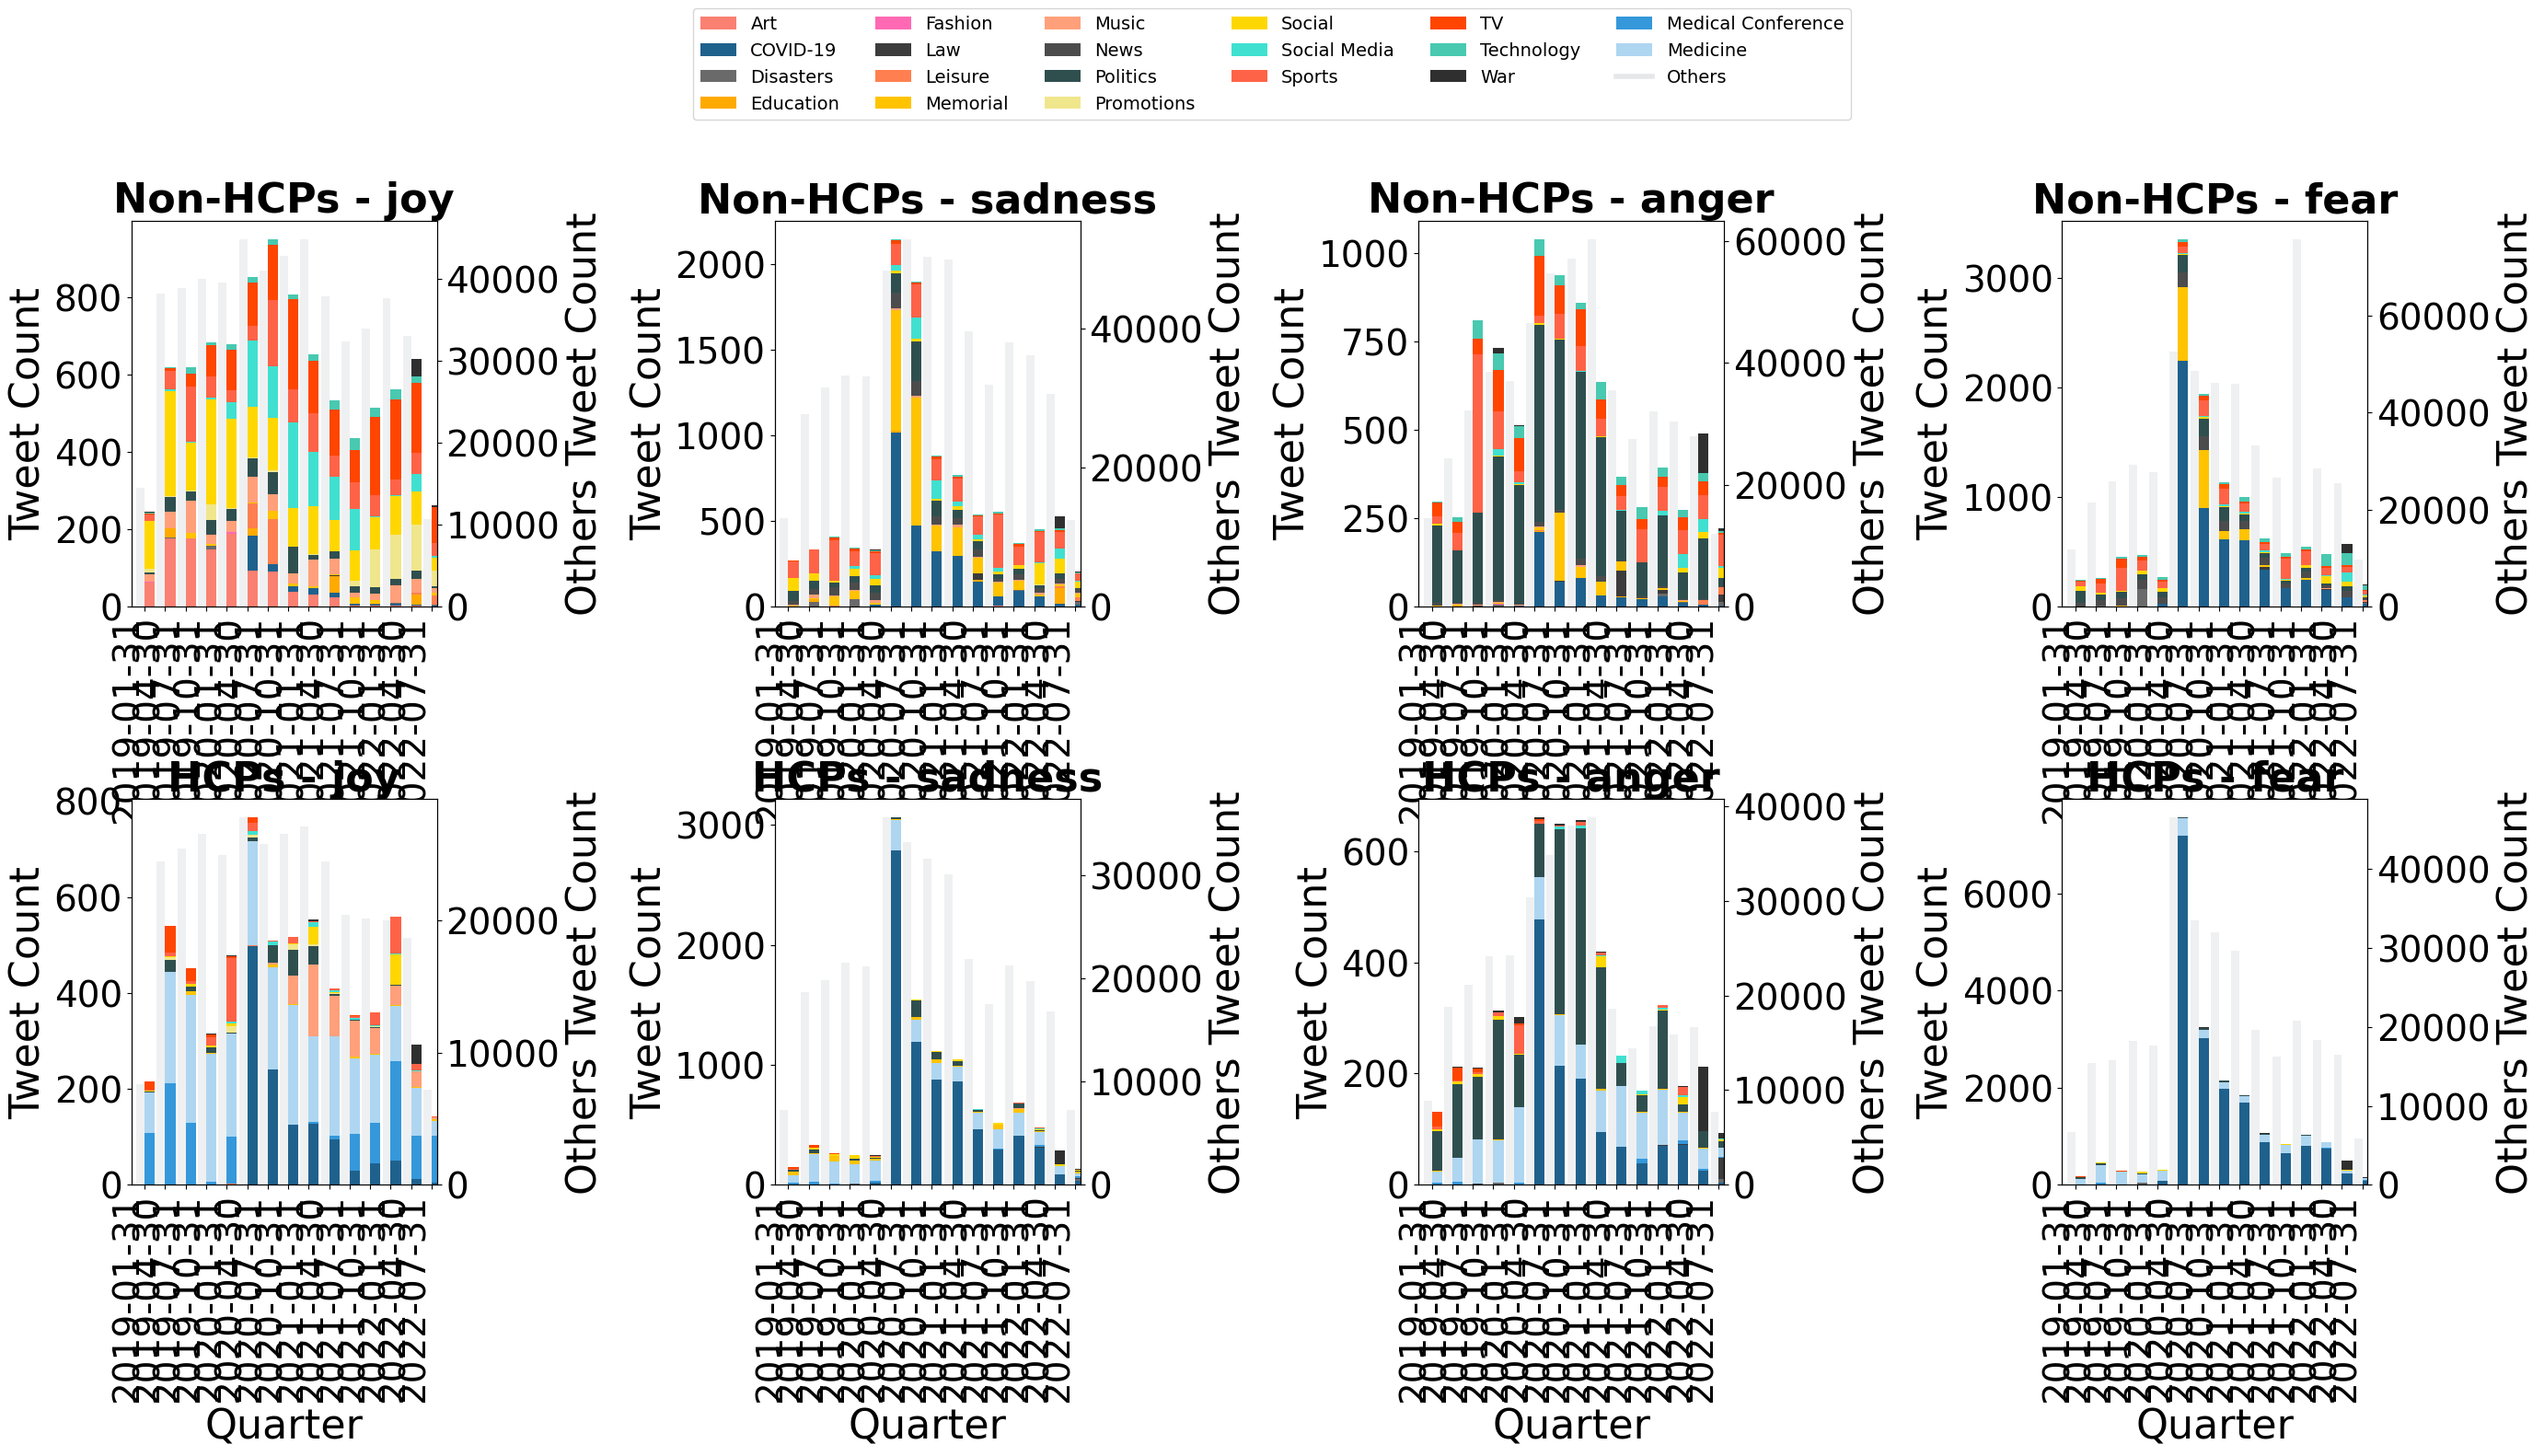

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

dic = {
'joy': 900,
'sadness': 3500,
'anger': 700,
'fear': 9000
}

def plot_df(top_hashtags, ax, title, emotion, hashtag_color_dict, dict_words_to_topic):
    hashtags = top_hashtags.index.get_level_values(1).unique().tolist()
    top_hashtags = top_hashtags.unstack()

    # Sort columns and separate "Others" from the rest
    sorted_columns = [col for col in top_hashtags.columns if col != 'Others']
    others_column = ['Others'] if 'Others' in top_hashtags.columns else []
    
    # Plot the main hashtags (excluding "Others") on the left Y axis
    ax_left = ax
    top_hashtags[sorted_columns].plot(kind='bar', stacked=True, ax=ax_left, color=[hashtag_color_dict[col] for col in sorted_columns], position=0)
    
    # Create a secondary Y axis for "Others"
    if others_column:
        ax_right = ax_left.twinx()
        # Add an offset to the bars for "Others" to avoid overlap
        top_hashtags[others_column].plot(kind='bar', stacked=True, ax=ax_right, color=[hashtag_color_dict['Others']], alpha=0.6, position=1, width=0.4)
        ax_right.set_ylabel('Others Tweet Count', fontsize=32)
        ax_right.tick_params(axis='y', labelsize=28)

    # Set X axis labels
    labels = [label.get_text().split(" ")[0] for label in ax_left.get_xticklabels()]  # Trim the date labels
    ax_left.set_xticklabels(labels, rotation=90, ha='right')

    # Set the main axis titles and labels
    ax_left.set_title(f'{title} - {emotion}', fontsize=32, fontweight='bold')
    ax_left.set_ylabel('Tweet Count', fontsize=32)
    ax_left.set_xlabel('Quarter', fontsize=32)
    ax_left.tick_params(axis='both', which='major', labelsize=28)

    # Ensure no legend is displayed for individual subplots
    ax_left.get_legend().remove()
    if others_column:
        ax_right.get_legend().remove()

def create_dashboard(top_hashtags_df1, top_hashtags_df2, emotions, hashtag_color_dict, dict_words_to_topic):
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D

    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(7 * len(emotions), 16))

    handles_list, labels_list = [], []

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        # Plot for Non-HWFs
        plot_df(
            top_hashtags_df1[emotion],
            ax_nonhcp,
            'Non-HCPs',
            emotion,
            hashtag_color_dict,
            dict_words_to_topic
        )

        # Plot for HWFs
        plot_df(
            top_hashtags_df2[emotion],
            ax_hcp,
            'HCPs',
            emotion,
            hashtag_color_dict,
            dict_words_to_topic
        )

        # Collect legend handles
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()
        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    # Add 'Others' if not present
    if 'Others' not in labels_list:
        labels_list.append('Others')
        handles_list.append(Line2D([0], [0], color=hashtag_color_dict['Others'], lw=4))

    # Remove duplicates by using a dictionary
    unique_handles_labels = dict(zip(labels_list, handles_list))

    # Draw a combined legend
    fig.legend(
        unique_handles_labels.values(),
        unique_handles_labels.keys(),
        loc='upper center',
        ncol=min(6, len(unique_handles_labels)),
        fontsize=14
    )

    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.85, hspace=0.5)
    plt.show()


# Example usage with 4 emotions
emotions = ['joy', 'sadness', 'anger', 'fear']
create_dashboard(top_hashtags_df1, top_hashtags_df2, emotions, new_order, dict_words_to_topic)


In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates



def plot_df(top_hashtags, ax, title, emotion, hashtag_color_dict, dict_words_to_topic):
    hashtags = top_hashtags.index.get_level_values(1).unique().tolist()
    top_hashtags = top_hashtags.unstack()

    # Sort columns and separate "Others" from the rest
    sorted_columns = [col for col in top_hashtags.columns if col != 'Others']
    others_column = ['Others'] if 'Others' in top_hashtags.columns else []
    
    # Plot the main hashtags (excluding "Others") on the left Y axis
    ax_left = ax
    top_hashtags[sorted_columns].plot(kind='bar', stacked=True, ax=ax_left, color=[hashtag_color_dict[col] for col in sorted_columns], position=0)
    
    # Create a secondary Y axis for "Others"
    if others_column:
        ax_right = ax_left.twinx()
        # Add an offset to the bars for "Others" to avoid overlap
        top_hashtags[others_column].plot(kind='bar', stacked=True, ax=ax_right, color=[hashtag_color_dict['Others']], alpha=0.6, position=1, width=0.4)
        ax_right.set_ylabel('Tweet Count for Category Others', fontsize=32)
        ax_right.tick_params(axis='y', labelsize=28)

    # Set X axis labels
   labels = [label.get_text().split(" ")[0] for label in ax_left.get_xticklabels()]
   ax_left.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    
    # Titles and labels
   ax_left.set_title(f'{title} - {emotion}', fontsize=16, fontweight='bold')
   ax_left.set_ylabel('Tweet Count', fontsize=12)
   ax_left.set_xlabel('Quarter', fontsize=12)
   ax_left.tick_params(axis='both', which='major', labelsize=10)
    
   if others_column:
        ax_right.set_ylabel('Others Tweet Count', fontsize=12)
        ax_right.tick_params(axis='y', labelsize=10)

    # Ensure no legend is displayed for individual subplots
    ax_left.get_legend().remove()
    if others_column:
        ax_right.get_legend().remove()

def create_dashboard(final_h, final_df_g, emotions, hashtag_shade_dict_n, dict_words_to_topic):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(50,20))#50,20  # Adjust ncols based on number of emotions

    handles_list, labels_list = [], []  # Variables to store handles and labels for the legend

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        # For non-HCWs (final_df_g)
        top_hashtags_df1 = get_top_has(final_df_g, emotion)  # Assuming get_top_has is defined elsewhere
        top_hashtags_df1 = add_category_to_df(top_hashtags_df1, has, 'nonhcp')
        plot_df(top_hashtags_df1, ax_nonhcp, 'Non-HWFs', emotion, hashtag_shade_dict_n, dict_words_to_topic)

        # For HCWs (final_h)
        top_hashtags_df2 = get_top_has(final_h, emotion)  # Assuming get_top_has is defined elsewhere
        top_hashtags_df2 = add_category_to_df(top_hashtags_df2, has, 'hcp')
        plot_df(top_hashtags_df2, ax_hcp, 'HWFs', emotion, hashtag_shade_dict_n, dict_words_to_topic)

        # Get handles and labels from both ax_nonhcp and ax_hcp
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()

        # Add to the collective handles and labels
        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    # Add 'Others' to the legend explicitly
    if 'Others' not in labels_list:
        labels_list.append('Others')
        handles_list.append(plt.Line2D([0], [0], color=hashtag_shade_dict_n['Others'], lw=4))

    unique_handles_labels = dict(zip(labels_list, handles_list))  # Remove duplicates by using a dict

    # Return the handles and labels for the legend
    return fig, unique_handles_labels



# Example usage with 4 emotions
emotions = ['joy', 'sadness', 'anger', 'fear']
fig, handles_labels = create_dashboard(final_h, new_final_df_g, emotions, new_order, dict_words_to_topic)

# Display the graph
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.2, top=0.85, hspace=0.7)
fig.subplots_adjust(bottom=0.2, top=1.05, hspace=0.7)
plt.savefig('fig4_HWF.png', dpi=300, bbox_inches='tight')  # אפשר גם לשנות לשם אחר או פורמט אחר כמו .pdf

fig.show()

# Now display the legend separately


IndentationError: unindent does not match any outer indentation level (<string>, line 28)

/tmp/ipykernel_227978/1916591481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_227978/1916591481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_227978/1916591481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

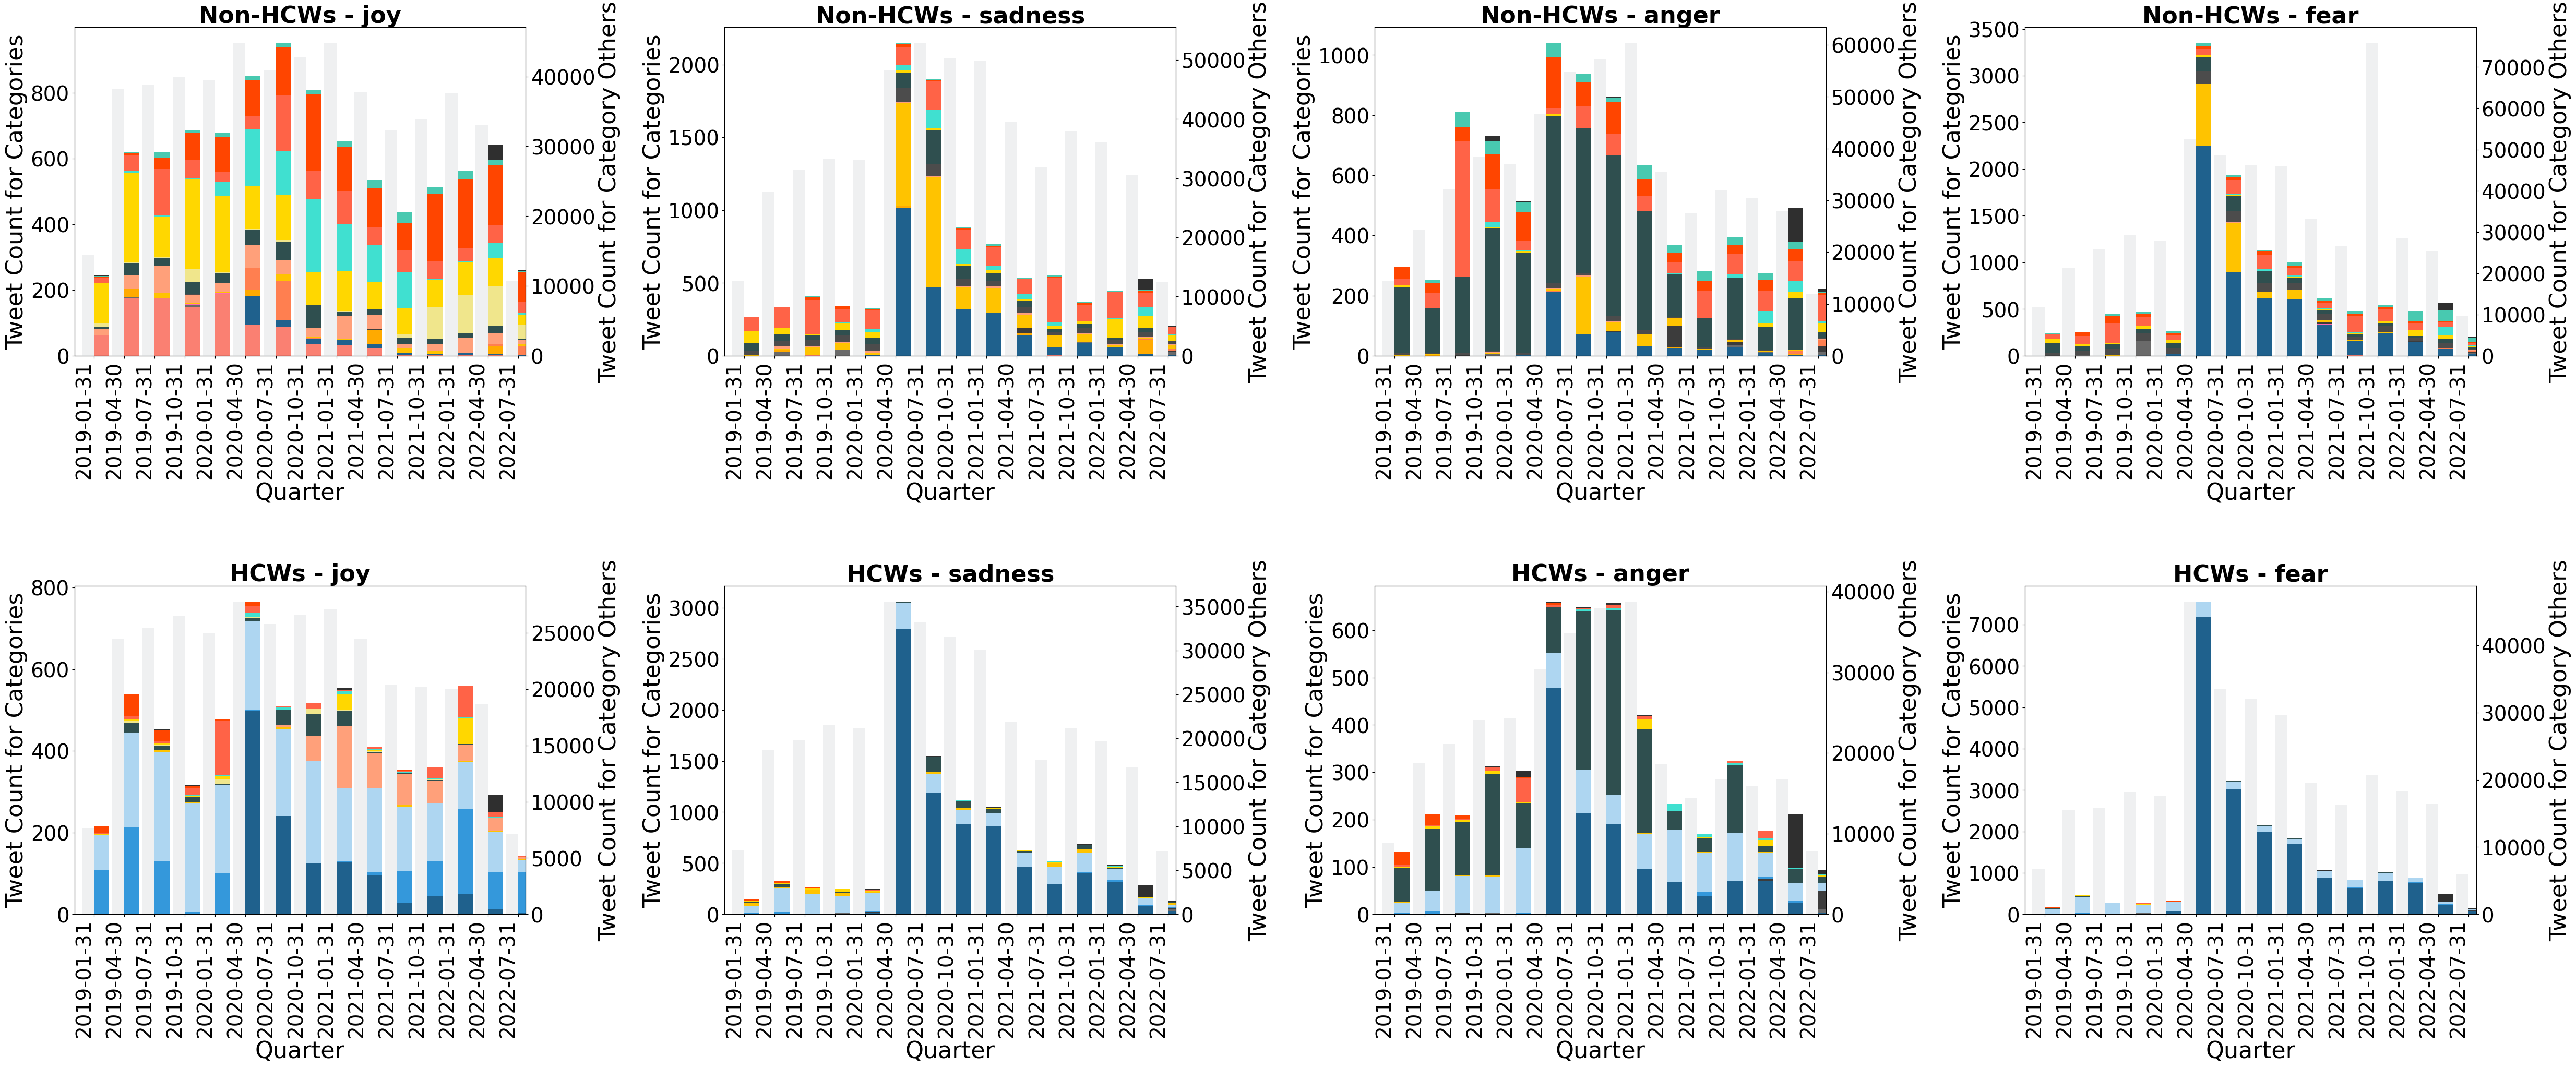

In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates



def plot_df(top_hashtags, ax, title, emotion, hashtag_color_dict, dict_words_to_topic):
    hashtags = top_hashtags.index.get_level_values(1).unique().tolist()
    top_hashtags = top_hashtags.unstack()

    # Sort columns and separate "Others" from the rest
    sorted_columns = [col for col in top_hashtags.columns if col != 'Others']
    others_column = ['Others'] if 'Others' in top_hashtags.columns else []
    
    # Plot the main hashtags (excluding "Others") on the left Y axis
    ax_left = ax
    top_hashtags[sorted_columns].plot(kind='bar', stacked=True, ax=ax_left, color=[hashtag_color_dict[col] for col in sorted_columns], position=0)
    
    # Create a secondary Y axis for "Others"
    if others_column:
        ax_right = ax_left.twinx()
        # Add an offset to the bars for "Others" to avoid overlap
        top_hashtags[others_column].plot(kind='bar', stacked=True, ax=ax_right, color=[hashtag_color_dict['Others']], alpha=0.6, position=1, width=0.4)
        ax_right.set_ylabel('Tweet Count for Category Others', fontsize=32)
        ax_right.tick_params(axis='y', labelsize=28)

    # Set X axis labels
    labels = [label.get_text().split(" ")[0] for label in ax_left.get_xticklabels()]  # Trim the date labels
    ax_left.set_xticklabels(labels, rotation=90, ha='right')

    # Set the main axis titles and labels
    ax_left.set_title(f'{title} - {emotion}', fontsize=32, fontweight='bold')
    ax_left.set_ylabel('Tweet Count for Categories', fontsize=32)
    ax_left.set_xlabel('Quarter', fontsize=32)
    ax_left.tick_params(axis='both', which='major', labelsize=28)

    # Ensure no legend is displayed for individual subplots
    ax_left.get_legend().remove()
    if others_column:
        ax_right.get_legend().remove()

def create_dashboard(final_h, final_df_g, emotions, hashtag_shade_dict_n, dict_words_to_topic):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(50,20))#50,20  # Adjust ncols based on number of emotions

    handles_list, labels_list = [], []  # Variables to store handles and labels for the legend

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        # For non-HCWs (final_df_g)
        top_hashtags_df1 = get_top_has(final_df_g, emotion)  # Assuming get_top_has is defined elsewhere
        top_hashtags_df1 = add_category_to_df(top_hashtags_df1, has, 'nonhcp')
        plot_df(top_hashtags_df1, ax_nonhcp, 'Non-HCWs', emotion, hashtag_shade_dict_n, dict_words_to_topic)

        # For HCWs (final_h)
        top_hashtags_df2 = get_top_has(final_h, emotion)  # Assuming get_top_has is defined elsewhere
        top_hashtags_df2 = add_category_to_df(top_hashtags_df2, has, 'hcp')
        plot_df(top_hashtags_df2, ax_hcp, 'HCWs', emotion, hashtag_shade_dict_n, dict_words_to_topic)

        # Get handles and labels from both ax_nonhcp and ax_hcp
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()

        # Add to the collective handles and labels
        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    # Add 'Others' to the legend explicitly
    if 'Others' not in labels_list:
        labels_list.append('Others')
        handles_list.append(plt.Line2D([0], [0], color=hashtag_shade_dict_n['Others'], lw=4))

    unique_handles_labels = dict(zip(labels_list, handles_list))  # Remove duplicates by using a dict

    # Return the handles and labels for the legend
    return fig, unique_handles_labels



# Example usage with 4 emotions
emotions = ['joy', 'sadness', 'anger', 'fear']
fig, handles_labels = create_dashboard(final_h, new_final_df_g, emotions, new_order, dict_words_to_topic)

# Display the graph
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.2, top=0.85, hspace=0.7)
fig.subplots_adjust(bottom=0.2, top=1.05, hspace=0.7)

fig.show()

# Now display the legend separately


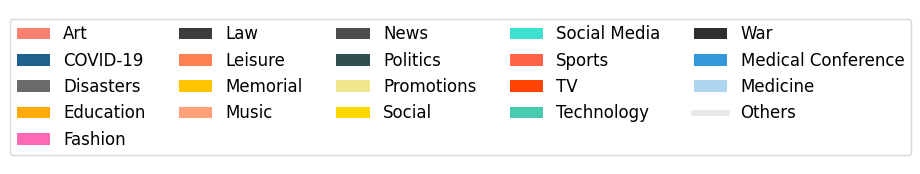

In [59]:
def plot_legend(handles_labels):
    # Create a separate figure for the legend
    fig_legend = plt.figure(figsize=(9, 2))
    ax_legend = fig_legend.add_subplot(111)
    ax_legend.legend(handles_labels.values(), handles_labels.keys(), loc='center', ncol=5, fontsize=12)
    ax_legend.axis('off')  # Hide the axis
    plt.savefig('fig4_leg.png', dpi=300, bbox_inches='tight')  

    plt.show()
plot_legend(handles_labels)


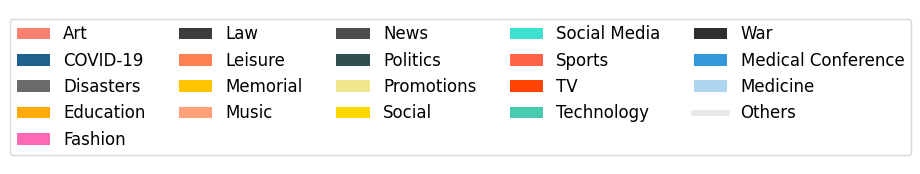

In [135]:
def plot_legend(handles_labels):
    # Create a separate figure for the legend
    fig_legend = plt.figure(figsize=(9, 2))
    ax_legend = fig_legend.add_subplot(111)
    ax_legend.legend(handles_labels.values(), handles_labels.keys(), loc='center', ncol=5, fontsize=12)
    ax_legend.axis('off')  # Hide the axis
    plt.savefig('fig4_leg.png', dpi=300, bbox_inches='tight')  

    plt.show()
plot_legend(handles_labels)


In [ ]:
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')  # Downloads the tokenizer required for tokenizing text
nltk.download('wordnet')  # Downloads the WordNet data for lemmatization
nltk.download('omw-1.4')  # Optional, to improve lemmatization for multiple languages

punctuation = string.punctuation + '…' + "’" +"”" + "“"

# Defining a list of stopwords including 'im'
stopwords = list(ENGLISH_STOP_WORDS) + ['im',"dont","youre","amp","la","just","did","let","got","want"] + [
    'like', 'time', 'day', 'know', 'need', 
    'say', 'make', 'think', 'right', 'want', 'love', 'going', 'thing',
    'did', 'great', 'way', 'let', 'got', 'really', 
    'look', 'said'
]


# Creating a lemmatizer object for lemmatization
lemmatizer = WordNetLemmatizer()

# Regular expression to detect emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                           u"\U00002702-\U000027B0"  # Miscellaneous Symbols
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)

def process_tweets(text):    
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove content inside square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('(@[A-Za-z0-9_]+)', '', text)  # Remove mentions (e.g., @username)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove new line characters
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing digits
    text = text.replace("rt ", "")  # Remove retweets 'RT'
    text = re.sub('[%s]' % re.escape(punctuation), '', text)  # Remove punctuation including ellipsis

    # Remove emojis
    text = emoji_pattern.sub(r'', text)  # Remove emojis from the text

    tokens = text.split()  # Split text into individual words (tokens)
    
    # Remove stopwords from the tokens
    tokens = [word for word in tokens if word.lower() not in stopwords]  

    # Perform lemmatization on the remaining words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)  
    return cleaned_text




In [ ]:
new_final_h['new_full_text'] = new_final_h['full_text'].apply(process_tweets)
new_final_df_g['new_full_text'] = new_final_df_g['full_text'].apply(process_tweets)



In [ ]:
# # Save new_final_h to a pickle file
# new_final_h.to_pickle('new_final_h.pkl')

# # Save new_final_df_g to a pickle file
# new_final_df_g.to_pickle('new_final_df_g.pkl')


import pandas as pd

# Load new_final_h from the pickle file
new_final_h = pd.read_pickle('new_final_h.pkl')

# Load new_final_df_g from the pickle file
new_final_df_g = pd.read_pickle('new_final_df_g.pkl')


In [ ]:
import re

# Function to remove Unicode control characters from text
def remove_unicode_controls(text):
    # Use regex to find and remove any control characters
    cleaned_text = re.sub(r'[\u2060-\u206F]', '', text)
    return cleaned_text

# Example usage
new_final_h['new_full_text'] = new_final_h['new_full_text'].apply(remove_unicode_controls)
new_final_df_g['new_full_text'] = new_final_df_g['new_full_text'].apply(remove_unicode_controls)


In [ ]:
# List of high frequency words
high_frequency_words = [
    'the', 'and', 'a', 'to', 'said', 'in', 'he', 'I', 'of', 'it', 'was', 'you', 'they', 'on', 
    'she', 'is', 'for', 'at', 'his', 'but', 'that', 'with', 'all', 'we', 'can', 'are', 'up', 
    'had', 'my', 'her', 'what', 'there', 'out', 'this', 'have', 'went', 'be', 'like', 'some', 
    'so', 'not', 'then', 'were', 'go', 'little', 'as', 'no', 'mum', 'one', 'them', 'do', 
    'me', 'down', 'dad', 'big', 'when', "it's", 'see', 'looked', 'very', 'look', "don't", 
    'come', 'will', 'into', 'back', 'from', 'children', 'him', 'Mr', 'get', 'just', 'now', 
    'came', 'oh', 'about', 'got', 'their', 'people', 'your', 'put', 'could', 'house', 'old', 
    'too', 'by', 'day', 'made', 'time', "I'm", 'if', 'help', 'Mrs', 'called', 'here', 'off', 
    'asked', 'saw', 'make', 'an',"people","thank","happy","good","today","looking"
]

def remove_high_frequency_words_and_replace(text):
    # Replace 'thanks' with 'thank'
    text = text.replace('thanks', 'thank')

    # Split the input text into words
    words = text.split()

    # Filter out high-frequency words
    filtered_words = [word for word in words if word.lower() not in high_frequency_words]

    # Join the filtered words back into a single string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

# Apply the function to the dataframes
new_final_h['new_full_text'] = new_final_h['new_full_text'].apply(remove_high_frequency_words_and_replace)
new_final_df_g['new_full_text'] = new_final_df_g['new_full_text'].apply(remove_high_frequency_words_and_replace)


In [ ]:
print(new_final_df_g.shape)
print(new_final_h.shape)
new_final_h = new_final_h[new_final_h['new_full_text'] != ""]
new_final_df_g = new_final_df_g[new_final_df_g['new_full_text'] != ""]
print(new_final_df_g.shape)
print(new_final_h.shape)

In [ ]:
new_final_h['words'] = new_final_h['new_full_text'].apply(lambda t: t.split())
new_final_df_g['words'] = new_final_df_g['new_full_text'].apply(lambda t: t.split())

In [ ]:
import nltk
from nltk import bigrams

# Ensure you have the necessary nltk resources
nltk.download('punkt')

# Function to split text into bigrams
def generate_bigrams(text):
    words = text.split()  # Split the text into words
    return list(bigrams(words))  # Convert the words into bigrams (list of tuples)

# Apply the bigram function to the 'new_full_text' column
new_final_h['bigram'] = new_final_h['new_full_text'].apply(generate_bigrams)
new_final_df_g['bigram'] = new_final_df_g['new_full_text'].apply(generate_bigrams)

# Example of the structure of the 'words' column:
new_final_h[['new_full_text', 'bigram']].head()


In [ ]:
import pandas as pd
import numpy as np

emotions = ['joy', 'sadness', 'anger', 'surprise', 'disgust', 'fear']

def get_top_words(df, emotion):
    df['date'] = pd.to_datetime(df['date'])

    # Filter based on the 90th percentile for the given emotion
    threshold = df[emotion].quantile(0.9)
    sorted_df = df[df[emotion] > threshold].sort_values(by=emotion, ascending=False)

    # Explode the words column
    sorted_df = sorted_df.explode('words')

    # Get the top 3 words for each 3-month period
    top_words = sorted_df.groupby(pd.Grouper(key='date', freq='3M'))['words'].value_counts().groupby(level=0).head(3)

    return top_words

# Initialize an empty dictionary to store the results
emotion_words_dict = {}

for emotion in emotions:
    top_words = get_top_words(new_final_h, emotion)
    
    # Initialize an empty dictionary for the current emotion
    emotion_words_dict[emotion] = {}

    # Iterate through the top words and store them in the dictionary
    for (date, word), count in top_words.items():
        if date not in emotion_words_dict[emotion]:
            emotion_words_dict[emotion][date] = []
        
        # Append the word to the list for the given date and emotion
        emotion_words_dict[emotion][date].append((word, count))

# Print the dictionary for inspection
print(emotion_words_dict)


In [ ]:
import pandas as pd
import numpy as np
from nltk import bigrams

emotions = ['joy', 'sadness', 'anger', 'surprise', 'disgust', 'fear']

# Function to generate bigrams from a list of words
def generate_bigrams(words_list):
    return list(bigrams(words_list))

# Modify the function to process bigrams
def get_top_bigrams(df, emotion):
    df['date'] = pd.to_datetime(df['date'])

    # Filter based on the 90th percentile for the given emotion
    threshold = df[emotion].quantile(0.9)
    sorted_df = df[df[emotion] > threshold].sort_values(by=emotion, ascending=False)

    # Generate bigrams from the 'words' column
    sorted_df['bigrams'] = sorted_df['words'].apply(generate_bigrams)

    # Explode the bigrams column
    sorted_df = sorted_df.explode('bigrams')

    # Get the top 3 bigrams for each 3-month period
    top_bigrams = sorted_df.groupby(pd.Grouper(key='date', freq='3M'))['bigrams'].value_counts().groupby(level=0).head(3)

    return top_bigrams

# Initialize an empty dictionary to store the results
emotion_bigrams_dict = {}

for emotion in emotions:
    top_bigrams = get_top_bigrams(new_final_df_g, emotion)
    
    # Initialize an empty dictionary for the current emotion
    emotion_bigrams_dict[emotion] = {}

    # Iterate through the top bigrams and store them in the dictionary
    for (date, bigram), count in top_bigrams.items():
        if date not in emotion_bigrams_dict[emotion]:
            emotion_bigrams_dict[emotion][date] = []
        
        # Append the bigram to the list for the given date and emotion
        emotion_bigrams_dict[emotion][date].append((bigram, count))

# Print the dictionary for inspection
print(emotion_bigrams_dict)


In [ ]:
# Define the bigram you're looking for
target_bigram = ('infinite', 'garlic')
# target_bigram= 'thank'
# Filter the DataFrame to find rows containing the specific bigram
filtered_rows = new_final_df_g[new_final_df_g['bigram'].apply(lambda bigrams: target_bigram in bigrams)]

# Display the filtered rows



In [ ]:
filtered_rows

In [ ]:
from collections import Counter

# Assuming 'd' contains the list of tweets
def get_most_common_words(tweets, top_n=10):
    all_words = []

    # Process each tweet and collect words
    for tweet in tweets:
        cleaned_tweet = process_tweets(tweet)  # Clean the tweet using the process_tweets function
        words = cleaned_tweet.split()  # Split the cleaned tweet into words
        all_words.extend(words)  # Add the words to the list of all words

    # Count the occurrences of each word
    word_counts = Counter(all_words)

    # Return the top_n most common words
    return word_counts.most_common(top_n)

# Example: Get the top 10 most common words from the list 'd' (your tweets)
most_common_words = get_most_common_words(d, top_n=50)

print(most_common_words)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

# Function to generate a unique color palette for the words
def get_word_color_dict(df_list):
    all_words = set()
    # Collect all unique words from both DataFrames
    for df in df_list:
        all_words.update(df['words'].explode().unique())
    
    # Generate colors for each word using a colormap
    color_palette = plt.get_cmap('tab20', len(all_words))  # Use a colormap with the number of unique words
    word_color_dict = {word: color_palette(i) for i, word in enumerate(all_words)}
    
    return word_color_dict

# Plotting function
def plot_words(top_words, ax, title, emotion, word_color_dict):
    top_words = top_words.unstack()

    sorted_columns = list(top_words.columns)  # Sort the columns (words)
    top_words = top_words[sorted_columns]
    
    # Use the word color dictionary to assign consistent colors to words
    colors = [word_color_dict.get(word, '#000000') for word in sorted_columns]  # Default to black if color not found
    
    # Plotting the sorted data
    top_words.plot(kind='bar', stacked=True, ax=ax, color=colors)

    labels = [label.get_text().split(" ")[0] for label in ax.get_xticklabels()]  # Trim date labels
    ax.set_xticklabels(labels, rotation=90, ha='right')

    # Setting axis titles and labels
    ax.set_title(f'{title} - {emotion}', fontsize=32, fontweight='bold')
    ax.set_ylabel('Count', fontsize=32)  # Words 
    ax.set_xlabel('Quarter', fontsize=32)
    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.get_legend().remove()  # Remove legend for each subplot

# Dashboard creation function
def create_word_dashboard(final_h, final_df_g, emotions, emotion_words_dict):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(50, 20))  # Adjust ncols based on number of emotions

    # Get unique word color dictionary from both DataFrames
    word_color_dict = get_word_color_dict([final_h, final_df_g])

    handles_list, labels_list = [], []  # Variables to store handles and labels for the legend

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        # For non-HCWs (final_df_g)
        top_words_df1 = get_top_words(final_df_g, emotion)  # Assuming get_top_words is defined elsewhere
        plot_words(top_words_df1, ax_nonhcp, 'Non-HCWs', emotion, word_color_dict)

        # For HCWs (final_h)
        top_words_df2 = get_top_words(final_h, emotion)  # Assuming get_top_words is defined elsewhere
        plot_words(top_words_df2, ax_hcp, 'HCWs', emotion, word_color_dict)

        # Collect the labels and handles for legend
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()

        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    unique_handles_labels = dict(zip(labels_list, handles_list))  # Remove duplicates by using a dict
    fig.legend(unique_handles_labels.values(), unique_handles_labels.keys(), loc='upper center', ncol=5, fontsize=28)

    # Adjust subplot parameters as needed
    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.subplots_adjust(top=0.80, hspace=0.7)  # Add space between rows (hspace)

    plt.show()

# Example usage with 4 emotions
emotions = ['joy', 'sadness', 'anger', 'fear']
create_word_dashboard(new_final_h, new_final_df_g, emotions, emotion_words_dict)


In [ ]:
import pandas as pd
import numpy as np

emotions = ['joy', 'sadness', 'anger', 'surprise', 'disgust', 'fear']

# def get_top_words(df, emotion):
#     df['date'] = pd.to_datetime(df['date'])

#     # Filter based on the 90th percentile for the given emotion
#     threshold = df[emotion].quantile(0.9)
#     sorted_df = df[df[emotion] > threshold].sort_values(by=emotion, ascending=False)

#     # Explode the words column
#     sorted_df = sorted_df.explode('words')

#     # Get the top 3 words for each 3-month period
#     top_words = sorted_df.groupby(pd.Grouper(key='date', freq='3M'))['words'].value_counts().groupby(level=0).head(3)

#     # Now get the unique list of top words across all time periods
#     global_top_words = set(top_words.index.get_level_values(1))  # Extract the unique top words globally

#     # Now classify the remaining words as 'Others'
#     def classify_word(word):
#         return word if word in global_top_words else 'Others'

#     # Apply the classification to the DataFrame
#     sorted_df['classified_words'] = sorted_df['words'].apply(classify_word)

#     # Group by the classified words and return the results
#     top_classified_words = sorted_df.groupby(pd.Grouper(key='date', freq='3M'))['classified_words'].value_counts().groupby(level=0).head(3)

#     return top_classified_words



import pandas as pd
import numpy as np

emotions = ['joy', 'sadness', 'anger', 'surprise', 'disgust', 'fear']

def get_top_words(df, emotion):
    df['date'] = pd.to_datetime(df['date'])

    # Filter based on the 90th percentile for the given emotion
    threshold = df[emotion].quantile(0.9)
    sorted_df = df[df[emotion] > threshold].sort_values(by=emotion, ascending=False)

    # Calculate the number of words per tweet before exploding
    sorted_df['word_count'] = sorted_df['words'].apply(len)

    # Calculate the weight for each word (1 divided by the number of words in the tweet)
    sorted_df['word_weight'] = 1 / sorted_df['word_count']

    # Explode the words column
    sorted_df = sorted_df.explode('words')

    # Now get the top 3 words for each 3-month period (regular counting)
    top_words = sorted_df.groupby(pd.Grouper(key='date', freq='3M'))['words'].value_counts().groupby(level=0).head(3)

    # Now get the unique list of top words across all time periods
    global_top_words = set(top_words.index.get_level_values(1))  # Extract the unique top words globally

    # Now classify the remaining words as 'Others'
    def classify_word(word):
        return word if word in global_top_words else 'Others'

    # Apply the classification to the DataFrame
    sorted_df['classified_words'] = sorted_df['words'].apply(classify_word)

    # Now group by the classified words and sum the word weights for the final count
    top_classified_words = sorted_df.groupby([pd.Grouper(key='date', freq='3M'), 'classified_words'])['word_weight'].sum()

    # Get the top 3 classified words for each 3-month period based on the weight
    top_classified_words = top_classified_words.groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

    return top_classified_words




# # Initialize an empty dictionary to store the results
# emotion_words_dict = {}

# for emotion in emotions:
#     top_words = get_top_words(new_final_h, emotion)
    
#     # Initialize an empty dictionary for the current emotion
#     emotion_words_dict[emotion] = {}

#     # Iterate through the top words and store them in the dictionary
#     for (date, word), count in top_words.items():
#         if date not in emotion_words_dict[emotion]:
#             emotion_words_dict[emotion][date] = []
        
#         # Append the word to the list for the given date and emotion
#         emotion_words_dict[emotion][date].append((word, count))

# Print the dictionary for inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

# Function to generate a unique color palette for the words
def get_word_color_dict(df_list):
    all_words = set()
    # Collect all unique words from both DataFrames
    for df in df_list:
        all_words.update(df['words'].explode().unique())
    
    # Ensure "Others" is included in the palette
    all_words.add("Others")
    
    # Generate colors for each word using a colormap
    color_palette = plt.get_cmap('tab20', len(all_words))  # Use a colormap with the number of unique words
    word_color_dict = {word: color_palette(i) for i, word in enumerate(all_words)}
    
    return word_color_dict

# Plotting function
def plot_words(top_words, ax, title, emotion, word_color_dict):
    top_words = top_words.unstack()

    sorted_columns = list(top_words.columns)  # Sort the columns (words)
    top_words = top_words[sorted_columns]
    
    # Use the word color dictionary to assign consistent colors to words
    colors = [word_color_dict.get(word, '#000000') for word in sorted_columns]  # Default to black if color not found
    
    # Plotting the sorted data
    top_words.plot(kind='bar', stacked=True, ax=ax, color=colors)

    labels = [label.get_text().split(" ")[0] for label in ax.get_xticklabels()]  # Trim date labels
    ax.set_xticklabels(labels, rotation=90, ha='right')

    # Setting axis titles and labels
    ax.set_title(f'{title} - {emotion}', fontsize=32, fontweight='bold')
    ax.set_ylabel('Count', fontsize=32)  # Words 
    ax.set_xlabel('Quarter', fontsize=32)
    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.get_legend().remove()  # Remove legend for each subplot

# Dashboard creation function
def create_word_dashboard(final_h, final_df_g, emotions, emotion_words_dict):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(50, 20))  # Adjust ncols based on number of emotions

    # Get unique word color dictionary from both DataFrames
    word_color_dict = get_word_color_dict([final_h, final_df_g])

    handles_list, labels_list = [], []  # Variables to store handles and labels for the legend

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        # For non-HCWs (final_df_g)
        top_words_df1 = get_top_words(final_df_g, emotion)  # Assuming get_top_words is defined elsewhere
        plot_words(top_words_df1, ax_nonhcp, 'Non-HCWs', emotion, word_color_dict)

        # For HCWs (final_h)
        top_words_df2 = get_top_words(final_h, emotion)  # Assuming get_top_words is defined elsewhere
        plot_words(top_words_df2, ax_hcp, 'HCWs', emotion, word_color_dict)

        # Collect the labels and handles for legend
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()

        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    unique_handles_labels = dict(zip(labels_list, handles_list))  # Remove duplicates by using a dict

    # Adjust subplot parameters as needed
    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.subplots_adjust(top=0.75, hspace=0.7)  # Add space between rows (hspace), reduce top for legend

    # Add legend at the bottom of the plot
    fig.legend(unique_handles_labels.values(), unique_handles_labels.keys(), loc='lower center', ncol=5, fontsize=28, bbox_to_anchor=(0.5, -0.1))

    plt.show()

# Example usage with 4 emotions
emotions = ['joy', 'sadness', 'anger', 'fear']
create_word_dashboard(new_final_h, new_final_df_g, emotions, emotion_words_dict)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

def get_top_words(df, emotion):
    df['date'] = pd.to_datetime(df['date'])

    # Filter based on the 90th percentile for the given emotion
    threshold = df[emotion].quantile(0.9)
    sorted_df = df[df[emotion] > threshold].sort_values(by=emotion, ascending=False)

    # Calculate the number of words per tweet before exploding
    sorted_df['word_count'] = sorted_df['words'].apply(len)

    # Calculate the weight for each word (1 divided by the number of words in the tweet)
    sorted_df['word_weight'] = 1 / sorted_df['word_count']

    # Explode the words column
    sorted_df = sorted_df.explode('words')

    # Get the top words for each 3-month period (without limiting to the top 3)
    top_words = sorted_df.groupby(pd.Grouper(key='date', freq='3M'))['words'].value_counts().groupby(level=0).head(3)

    # Now get the unique list of top words across all time periods
    global_top_words = set(top_words.index.get_level_values(1))  # Extract the unique top words globally

    # Now classify the remaining words as 'Others'
    def classify_word(word):
        return word if word in global_top_words else 'Others'

    # Apply the classification to the DataFrame
    sorted_df['classified_words'] = sorted_df['words'].apply(classify_word)

    # Now group by the classified words and sum the word weights for the final count
    top_classified_words = sorted_df.groupby([pd.Grouper(key='date', freq='3M'), 'classified_words'])['word_weight'].sum()

    return top_classified_words


# Function to generate a unique color palette for the words
def get_word_color_dict(df_list):
    all_words = set()
    # Collect all unique words from both DataFrames
    for df in df_list:
        all_words.update(df['words'].explode().unique())
    
    # Ensure "Others" is included in the palette
    all_words.add("Others")
    
    # Generate colors for each word using a colormap
    color_palette = plt.get_cmap('tab20', len(all_words))  # Use a colormap with the number of unique words
    word_color_dict = {word: color_palette(i) for i, word in enumerate(all_words)}
    
    # Explicitly set 'coronavirus' to black
    word_color_dict['coronavirus'] = '#000000'
    
    return word_color_dict

# Plotting function
def plot_words(top_words, ax, title, emotion, word_color_dict):
    top_words = top_words.unstack()

    sorted_columns = list(top_words.columns)  # Sort the columns (words)
    top_words = top_words[sorted_columns]
    
    # Use the word color dictionary to assign consistent colors to words
    colors = [word_color_dict.get(word, '#000000') for word in sorted_columns]  # Default to black if color not found
    
    # Plotting the sorted data
    top_words.plot(kind='bar', stacked=True, ax=ax, color=colors)

    labels = [label.get_text().split(" ")[0] for label in ax.get_xticklabels()]  # Trim date labels
    ax.set_xticklabels(labels, rotation=90, ha='right')

    # Setting axis titles and labels
    ax.set_title(f'{title} - {emotion}', fontsize=32, fontweight='bold')
    ax.set_ylabel('Count', fontsize=32)  # Words 
    ax.set_xlabel('Quarter', fontsize=32)
    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.get_legend().remove()  # Remove legend for each subplot

# Dashboard creation function
def create_word_dashboard(final_h, final_df_g, emotions):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(50, 20))  # Adjust ncols based on number of emotions

    # Get unique word color dictionary from both DataFrames
    word_color_dict = get_word_color_dict([final_h, final_df_g])

    handles_list, labels_list = [], []  # Variables to store handles and labels for the legend

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        # For non-HCWs (final_df_g)
        top_words_df1 = get_top_words(final_df_g, emotion)  # Assuming get_top_words is defined elsewhere
        plot_words(top_words_df1, ax_nonhcp, 'Non-HCWs', emotion, word_color_dict)

        # For HCWs (final_h)
        top_words_df2 = get_top_words(final_h, emotion)  # Assuming get_top_words is defined elsewhere
        plot_words(top_words_df2, ax_hcp, 'HCWs', emotion, word_color_dict)

        # Collect the labels and handles for legend
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()

        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    unique_handles_labels = dict(zip(labels_list, handles_list))  # Remove duplicates by using a dict

    # Adjust subplot parameters as needed
    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.subplots_adjust(top=0.75, hspace=0.9)  # Add space between rows (hspace)

    # Return the unique handles and labels to print the legend separately
    return unique_handles_labels

# Function to plot the legend separately
def plot_legend(handles_labels):
    fig_legend = plt.figure(figsize=(12, 2))
    fig_legend.legend(handles_labels.values(), handles_labels.keys(), loc='center', ncol=5, fontsize=14)
    plt.show()

# Example usage with 4 emotions
emotions = ['joy', 'sadness', 'anger', 'fear']
handles_labels = create_word_dashboard(new_final_h, new_final_df_g, emotions)

# Now plot the legend separately
plot_legend(handles_labels)


In [ ]:
def plot_legend(handles_labels):
    fig_legend = plt.figure(figsize=(12, 2))
    ax_legend = fig_legend.add_subplot(111)  # Add an axis to the figure
    ax_legend.legend(handles_labels.values(), handles_labels.keys(), loc='center', ncol=5, fontsize=14)
    ax_legend.axis('off')  # Hide the axis
    plt.show()

# Now plot the legend separately
plot_legend(handles_labels)

In [ ]:
new_final_h

In [ ]:
import pandas as pd
import numpy as np
from nltk import bigrams
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from nltk import bigrams

# Function to generate bigrams from a list of words
def generate_bigrams(words_list):
    return list(bigrams(words_list))

# Modify the function to process bigrams with weights
def get_top_bigrams(df, emotion):
    df['date'] = pd.to_datetime(df['date'])

    # Filter based on the 90th percentile for the given emotion
    threshold = df[emotion].quantile(0.9)
    sorted_df = df[df[emotion] > threshold].sort_values(by=emotion, ascending=False)

    # Calculate the number of bigrams per tweet before exploding
    # sorted_df['bigrams'] = sorted_df['words'].apply(generate_bigrams)
    sorted_df['bigram_count'] = sorted_df['bigram'].apply(len)

    # Calculate the weight for each bigram (1 divided by the number of bigrams in the tweet)
    sorted_df['bigram_weight'] = 1 / sorted_df['bigram_count'].replace(0, 1)

    # Explode the bigrams column
    sorted_df = sorted_df.explode('bigram')

    # Get the top 3 bigrams for each 3-month period (regular counting)
    top_bigrams = sorted_df.groupby(pd.Grouper(key='date', freq='3M'))['bigram'].value_counts().groupby(level=0).head(3)

    # Get the unique list of top bigrams across all time periods
    global_top_bigrams = set(top_bigrams.index.get_level_values(1))  # Extract the unique top bigrams globally

    # Now classify the remaining bigrams as 'Others'
    def classify_bigram(bigram):
        return bigram if bigram in global_top_bigrams else 'Others'

    # Apply the classification to the DataFrame
    sorted_df['classified_bigrams'] = sorted_df['bigram'].apply(classify_bigram)

    # Group by the classified bigrams and sum the bigram weights for the final count
    top_classified_bigrams = sorted_df.groupby([pd.Grouper(key='date', freq='3M'), 'classified_bigrams'])['bigram_weight'].sum()
    # top_classified_words = sorted_df.groupby([pd.Grouper(key='date', freq='3M'), 'classified_words'])['word_weight'].sum()

    # Get the top 3 classified bigrams for each 3-month period based on the weight
    # top_classified_bigrams = top_classified_bigrams.groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

    return top_classified_bigrams


# Function to generate a unique color palette for the bigrams
def get_bigram_color_dict(df_list):
    all_bigrams = set()
    # Collect all unique bigrams from both DataFrames
    for df in df_list:
        all_bigrams.update(df['bigram'].explode().unique())
    
    # Ensure "Others" is included in the palette
    all_bigrams.add("Others")
    
    # Generate colors for each bigram using a colormap
    color_palette = plt.get_cmap('tab20', len(all_bigrams))  # Use a colormap with the number of unique bigrams
    bigram_color_dict = {bigram: color_palette(i) for i, bigram in enumerate(all_bigrams)}
    
    return bigram_color_dict

# Plotting function for bigrams
def plot_bigrams(top_bigrams, ax, title, emotion, bigram_color_dict):
    top_bigrams = top_bigrams.unstack()

    sorted_columns = list(top_bigrams.columns)  # Sort the columns (bigrams)
    top_bigrams = top_bigrams[sorted_columns]
    
    # Use the bigram color dictionary to assign consistent colors to bigrams
    colors = [bigram_color_dict.get(bigram, '#000000') for bigram in sorted_columns]  # Default to black if color not found
    
    # Plotting the sorted data
    top_bigrams.plot(kind='bar', stacked=True, ax=ax, color=colors)

    labels = [label.get_text().split(" ")[0] for label in ax.get_xticklabels()]  # Trim date labels
    ax.set_xticklabels(labels, rotation=90, ha='right')

    # Setting axis titles and labels
    ax.set_title(f'{title} - {emotion}', fontsize=32, fontweight='bold')
    ax.set_ylabel('Count', fontsize=32)  # Bigrams
    ax.set_xlabel('Quarter', fontsize=32)
    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.get_legend().remove()  # Remove legend for each subplot

# Dashboard creation function for bigrams
def create_bigram_dashboard(final_h, final_df_g, emotions):
    fig, axes = plt.subplots(nrows=2, ncols=len(emotions), figsize=(50, 20))  # Adjust ncols based on number of emotions

    # Get unique bigram color dictionary from both DataFrames
    bigram_color_dict = get_bigram_color_dict([final_h, final_df_g])

    handles_list, labels_list = [], []  # Variables to store handles and labels for the legend

    for i, emotion in enumerate(emotions):
        ax_nonhcp = axes[0, i]
        ax_hcp = axes[1, i]

        # For non-HCWs (final_df_g)
        top_bigrams_df1 = get_top_bigrams(final_df_g, emotion)  # Assuming get_top_bigrams is defined elsewhere
        plot_bigrams(top_bigrams_df1, ax_nonhcp, 'Non-HCWs', emotion, bigram_color_dict)

        # For HCWs (final_h)
        top_bigrams_df2 = get_top_bigrams(final_h, emotion)  # Assuming get_top_bigrams is defined elsewhere
        plot_bigrams(top_bigrams_df2, ax_hcp, 'HCWs', emotion, bigram_color_dict)

        # Collect the labels and handles for legend
        handles_nonhcp, labels_nonhcp = ax_nonhcp.get_legend_handles_labels()
        handles_hcp, labels_hcp = ax_hcp.get_legend_handles_labels()

        handles_list.extend(handles_nonhcp + handles_hcp)
        labels_list.extend(labels_nonhcp + labels_hcp)

    unique_handles_labels = dict(zip(labels_list, handles_list))  # Remove duplicates by using a dict

    # Adjust subplot parameters as needed
    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.subplots_adjust(top=0.75, hspace=0.9)  # Add space between rows (hspace)

    # Return the unique handles and labels to print the legend separately
    return unique_handles_labels

# Function to plot the legend separately
def plot_legend(handles_labels):
    fig_legend = plt.figure(figsize=(12, 2))
    ax_legend = fig_legend.add_subplot(111)  # Add an axis to the figure
    ax_legend.legend(handles_labels.values(), handles_labels.keys(), loc='center', ncol=5, fontsize=14)
    ax_legend.axis('off')  # Hide the axis
    plt.show()


# Example usage with 4 emotions and bigrams
emotions = ['joy', 'sadness', 'anger', 'fear']
handles_labels = create_bigram_dashboard(new_final_h, new_final_df_g, emotions)

# Now plot the legend separately
plot_legend(handles_labels)
